# 🧠 Deep Learning & Neural Networks - Practical Introduction

This notebook provides a hands-on introduction to neural networks and deep learning, building on concepts from previous sessions.

**Session Flow (60-90 minutes):**

1. Introduction & Setup
2. Neural Network Fundamentals (neurons, activations, layers)
3. Training Neural Networks (loss, gradient descent, backpropagation)
4. Binary Classification with PyTorch (Titanic dataset)
5. Multi-Class Classification (MNIST digits)
6. Best Practices & Conclusions

---

### ✅ Learning Goals

By the end of this session, you will be able to:

- Understand how neurons combine inputs with weights, biases, and activation functions
- Explain the role of loss functions and gradient descent in training
- Build and train neural networks using PyTorch
- Apply neural networks to binary and multi-class classification problems
- Compare neural networks with traditional ML models
- Recognize and address overfitting

### 💡 Why Neural Networks?

**When to use neural networks:**
- ✅ Large datasets with complex patterns
- ✅ Image, text, or sequence data
- ✅ Problems requiring feature learning (not hand-crafted features)

**When traditional ML might be better:**
- ❌ Small tabular datasets (< 1000 samples)
- ❌ Need for interpretability
- ❌ Limited computational resources

## 0. Setup & Imports

Let's import the essential libraries for building and training neural networks.

In [1]:
# Core imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# PyTorch imports
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Scikit-learn for data preprocessing and metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Visualization settings
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Set random seeds for reproducibility
np.random.seed(42)
torch.manual_seed(42)

# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"✅ Using device: {device}")
print(f"✅ PyTorch version: {torch.__version__}")
print("✅ All imports ready!")

✅ Using device: cpu
✅ PyTorch version: 2.8.0+cu128
✅ All imports ready!


## 1. Neural Network Fundamentals

Before we dive into PyTorch, let's build intuition about how neural networks work by understanding their basic building blocks.

### 1.1 The Biological Inspiration (Brief)

Artificial neural networks are loosely inspired by biological neurons in the brain:
- **Biological neuron**: Receives signals via dendrites, processes them in the cell body, and fires via the axon
- **Artificial neuron**: Receives inputs, applies weights and bias, passes through activation function, and produces output

While the biological inspiration is interesting, modern neural networks have evolved far beyond simple brain models!

### 1.2 Anatomy of a Single Neuron

A single artificial neuron performs these steps:

1. **Receives inputs**: x₁, x₂, ..., xₙ
2. **Applies weights**: Each input is multiplied by a weight (w₁, w₂, ..., wₙ)
3. **Adds bias**: A bias term (b) is added
4. **Computes weighted sum**: z = w₁x₁ + w₂x₂ + ... + wₙxₙ + b
5. **Applies activation function**: output = activation(z)

**Mathematical representation:**
```
z = Σ(wᵢ × xᵢ) + b
output = activation(z)
```

Let's visualize this:

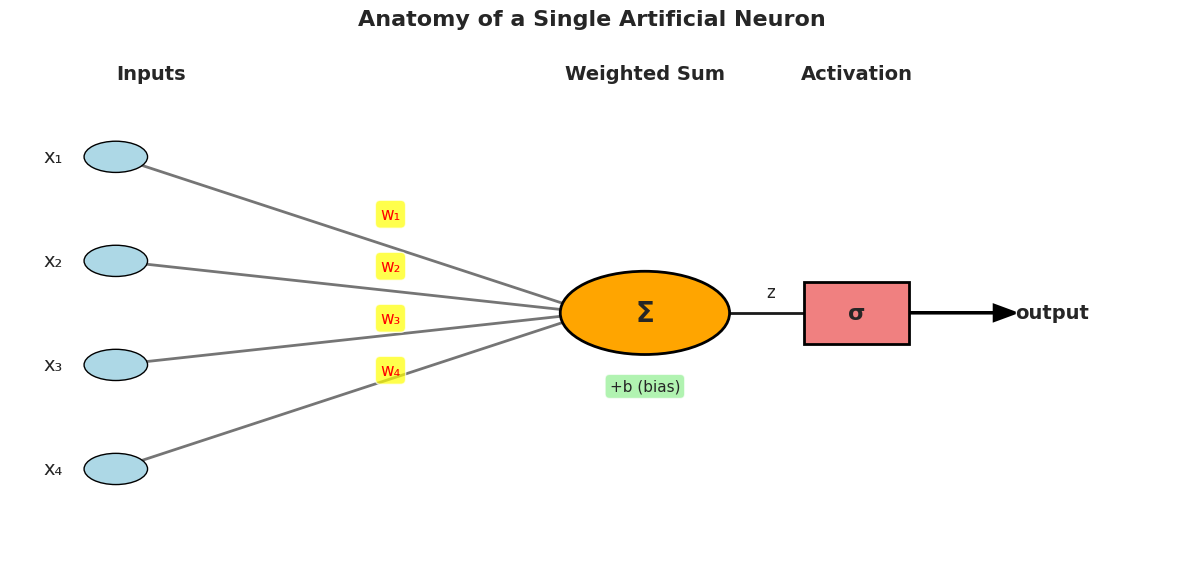

🔍 Key Components:
  • Inputs (x₁, x₂, ...): Data features
  • Weights (w₁, w₂, ...): Learned parameters that scale inputs
  • Bias (b): Learned parameter that shifts the output
  • Weighted sum (z): Linear combination of inputs
  • Activation (σ): Non-linear function applied to z
  • Output: Final neuron value passed to next layer


In [2]:
# Visualize a single neuron
fig, ax = plt.subplots(figsize=(12, 6))

# Neuron position
neuron_x, neuron_y = 0.6, 0.5

# Input positions
inputs = [(0.1, 0.8), (0.1, 0.6), (0.1, 0.4), (0.1, 0.2)]
input_labels = ['x₁', 'x₂', 'x₃', 'x₄']
weights = ['w₁', 'w₂', 'w₃', 'w₄']

# Draw inputs
for i, ((x, y), label) in enumerate(zip(inputs, input_labels)):
    circle = plt.Circle((x, y), 0.03, color='lightblue', ec='black', zorder=3)
    ax.add_patch(circle)
    ax.text(x-0.05, y, label, fontsize=14, ha='right', va='center')
    
    # Draw connections with weights
    ax.plot([x, neuron_x-0.05], [y, neuron_y], 'k-', alpha=0.6, linewidth=2)
    mid_x, mid_y = (x + neuron_x) / 2, (y + neuron_y) / 2
    ax.text(mid_x, mid_y + 0.03, weights[i], fontsize=12, color='red', 
            bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))

# Draw neuron
neuron = plt.Circle((neuron_x, neuron_y), 0.08, color='orange', ec='black', linewidth=2, zorder=3)
ax.add_patch(neuron)
ax.text(neuron_x, neuron_y, 'Σ', fontsize=20, ha='center', va='center', weight='bold')

# Draw bias
ax.text(neuron_x, neuron_y - 0.15, '+b (bias)', fontsize=11, ha='center', 
        bbox=dict(boxstyle='round,pad=0.3', facecolor='lightgreen', alpha=0.7))

# Draw activation function
act_x, act_y = 0.8, 0.5
rect = plt.Rectangle((act_x-0.05, act_y-0.06), 0.1, 0.12, 
                      facecolor='lightcoral', ec='black', linewidth=2, zorder=3)
ax.add_patch(rect)
ax.text(act_x, act_y, 'σ', fontsize=16, ha='center', va='center', weight='bold')
ax.plot([neuron_x+0.08, act_x-0.05], [neuron_y, act_y], 'k-', linewidth=2)
ax.text((neuron_x+0.08 + act_x-0.05)/2, neuron_y + 0.03, 'z', fontsize=12, 
        bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.8))

# Draw output
output_x = 0.95
ax.arrow(act_x+0.05, act_y, 0.08, 0, head_width=0.03, head_length=0.02, 
         fc='black', ec='black', linewidth=2)
ax.text(output_x, act_y, 'output', fontsize=14, ha='left', va='center', weight='bold')

# Labels
ax.text(0.1, 0.95, 'Inputs', fontsize=14, weight='bold')
ax.text(neuron_x, 0.95, 'Weighted Sum', fontsize=14, weight='bold', ha='center')
ax.text(act_x, 0.95, 'Activation', fontsize=14, weight='bold', ha='center')

ax.set_xlim(0, 1.1)
ax.set_ylim(0, 1)
ax.axis('off')
ax.set_title('Anatomy of a Single Artificial Neuron', fontsize=16, weight='bold', pad=20)
plt.tight_layout()
plt.show()

print("🔍 Key Components:")
print("  • Inputs (x₁, x₂, ...): Data features")
print("  • Weights (w₁, w₂, ...): Learned parameters that scale inputs")
print("  • Bias (b): Learned parameter that shifts the output")
print("  • Weighted sum (z): Linear combination of inputs")
print("  • Activation (σ): Non-linear function applied to z")
print("  • Output: Final neuron value passed to next layer")

In [3]:
# Implement a simple neuron from scratch
def simple_neuron(inputs, weights, bias, activation='sigmoid'):
    """
    Implements a single neuron.
    
    Args:
        inputs: array of input values
        weights: array of weight values (same length as inputs)
        bias: bias value
        activation: activation function ('sigmoid', 'relu', 'none')
    
    Returns:
        output value
    """
    # Weighted sum
    z = np.dot(inputs, weights) + bias
    
    # Apply activation function
    if activation == 'sigmoid':
        output = 1 / (1 + np.exp(-z))
    elif activation == 'relu':
        output = np.maximum(0, z)
    elif activation == 'none':
        output = z
    else:
        raise ValueError(f"Unknown activation: {activation}")
    
    return output, z

# Example: predict if a person will buy a product
# Features: [age_normalized, income_normalized, website_visits, previous_purchases]
inputs = np.array([0.5, 0.8, 10, 2])
weights = np.array([0.3, 0.5, 0.1, 0.4])
bias = -0.2

output, z = simple_neuron(inputs, weights, bias, activation='sigmoid')

print("🔍 Single Neuron Example: Will this customer buy?")
print(f"Inputs: {inputs}")
print(f"Weights: {weights}")
print(f"Bias: {bias}")
print(f"Weighted sum (z): {z:.4f}")
print(f"Output (after sigmoid): {output:.4f}")
print(f"Prediction: {'YES, likely to buy' if output > 0.5 else 'NO, unlikely to buy'} ({output:.1%} confidence)")

🔍 Single Neuron Example: Will this customer buy?
Inputs: [ 0.5  0.8 10.   2. ]
Weights: [0.3 0.5 0.1 0.4]
Bias: -0.2
Weighted sum (z): 2.1500
Output (after sigmoid): 0.8957
Prediction: YES, likely to buy (89.6% confidence)


### 1.3 Activation Functions

**Why do we need activation functions?**

Without activation functions, neural networks would just be stacking linear transformations, which would collapse into a single linear transformation. Activation functions introduce **non-linearity**, allowing networks to learn complex patterns.

Let's visualize the most common activation functions:

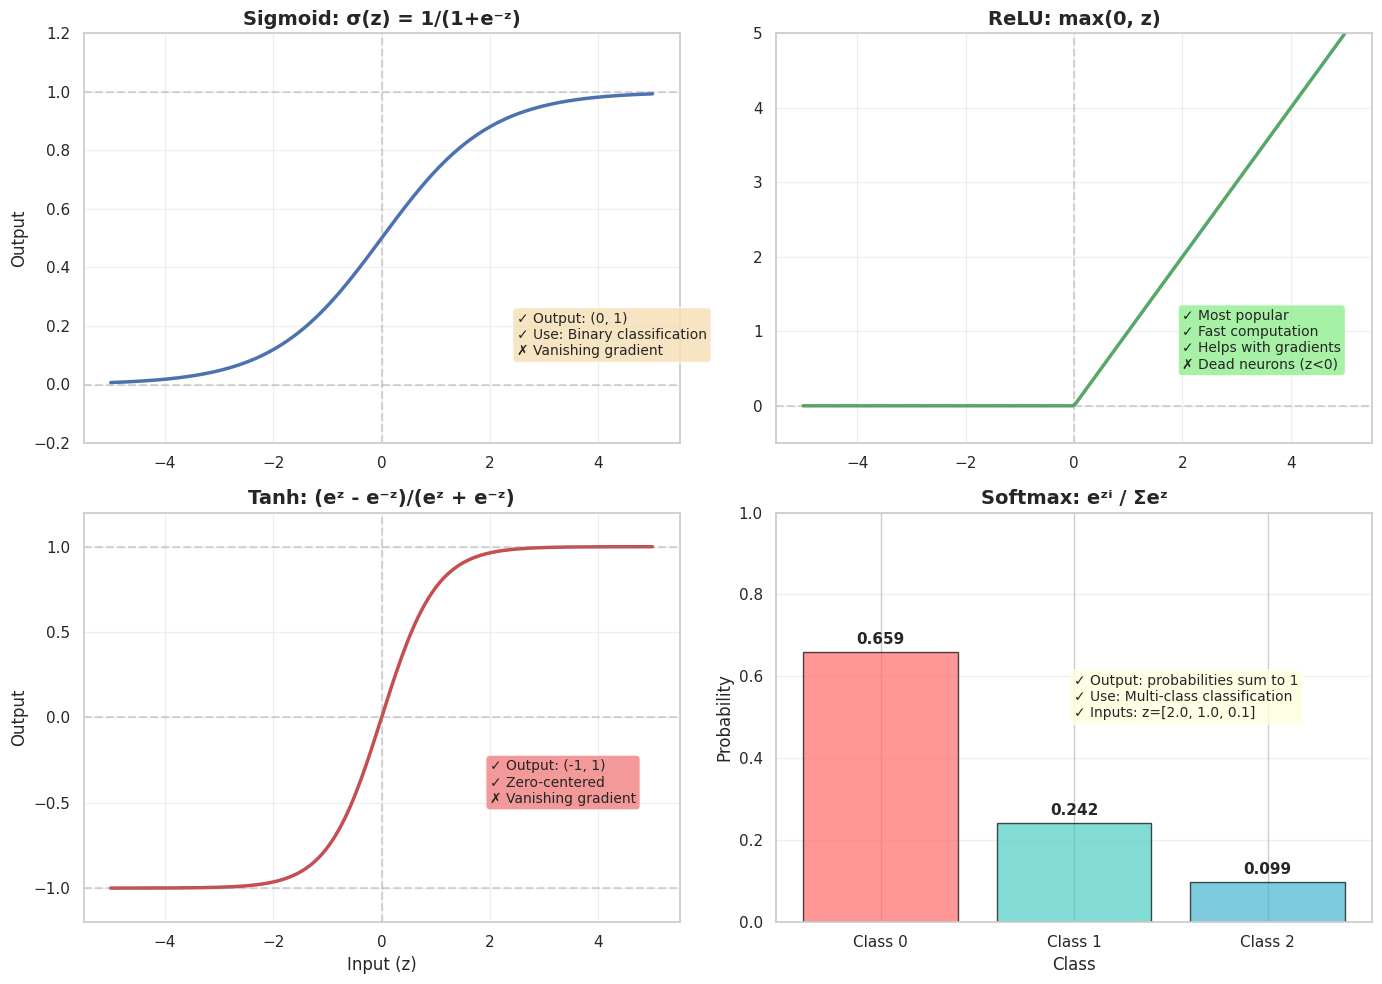

📊 ACTIVATION FUNCTIONS SUMMARY:
════════════════════════════════════════════════════════════
Sigmoid   → Binary classification (output layer)
ReLU      → Hidden layers (most common, default choice)
Tanh      → Hidden layers (when zero-centered data helps)
Softmax   → Multi-class classification (output layer)

💡 Rule of thumb: Use ReLU for hidden layers, sigmoid/softmax for output!


In [4]:
# Define activation functions
def sigmoid(z):
    return 1 / (1 + np.exp(-np.clip(z, -500, 500)))  # clip to avoid overflow

def relu(z):
    return np.maximum(0, z)

def tanh(z):
    return np.tanh(z)

def softmax(z):
    exp_z = np.exp(z - np.max(z))  # subtract max for numerical stability
    return exp_z / exp_z.sum()

# Create input range
z = np.linspace(-5, 5, 200)

# Plot activation functions
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Sigmoid
axes[0, 0].plot(z, sigmoid(z), 'b-', linewidth=2.5)
axes[0, 0].axhline(0, color='gray', linestyle='--', alpha=0.3)
axes[0, 0].axhline(1, color='gray', linestyle='--', alpha=0.3)
axes[0, 0].axvline(0, color='gray', linestyle='--', alpha=0.3)
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_title('Sigmoid: σ(z) = 1/(1+e⁻ᶻ)', fontsize=14, weight='bold')
axes[0, 0].set_ylabel('Output', fontsize=12)
axes[0, 0].set_ylim(-0.2, 1.2)
axes[0, 0].text(2.5, 0.1, '✓ Output: (0, 1)\n✓ Use: Binary classification\n✗ Vanishing gradient', 
                fontsize=10, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# ReLU
axes[0, 1].plot(z, relu(z), 'g-', linewidth=2.5)
axes[0, 1].axhline(0, color='gray', linestyle='--', alpha=0.3)
axes[0, 1].axvline(0, color='gray', linestyle='--', alpha=0.3)
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_title('ReLU: max(0, z)', fontsize=14, weight='bold')
axes[0, 1].set_ylim(-0.5, 5)
axes[0, 1].text(2, 0.5, '✓ Most popular\n✓ Fast computation\n✓ Helps with gradients\n✗ Dead neurons (z<0)', 
                fontsize=10, bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))

# Tanh
axes[1, 0].plot(z, tanh(z), 'r-', linewidth=2.5)
axes[1, 0].axhline(0, color='gray', linestyle='--', alpha=0.3)
axes[1, 0].axhline(1, color='gray', linestyle='--', alpha=0.3)
axes[1, 0].axhline(-1, color='gray', linestyle='--', alpha=0.3)
axes[1, 0].axvline(0, color='gray', linestyle='--', alpha=0.3)
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_title('Tanh: (eᶻ - e⁻ᶻ)/(eᶻ + e⁻ᶻ)', fontsize=14, weight='bold')
axes[1, 0].set_xlabel('Input (z)', fontsize=12)
axes[1, 0].set_ylabel('Output', fontsize=12)
axes[1, 0].set_ylim(-1.2, 1.2)
axes[1, 0].text(2, -0.5, '✓ Output: (-1, 1)\n✓ Zero-centered\n✗ Vanishing gradient', 
                fontsize=10, bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.8))

# Softmax (multi-class example)
z_multi = np.array([2.0, 1.0, 0.1])
softmax_output = softmax(z_multi)
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
axes[1, 1].bar(range(len(z_multi)), softmax_output, color=colors, alpha=0.7, edgecolor='black')
axes[1, 1].set_title('Softmax: eᶻⁱ / Σeᶻ', fontsize=14, weight='bold')
axes[1, 1].set_xlabel('Class', fontsize=12)
axes[1, 1].set_ylabel('Probability', fontsize=12)
axes[1, 1].set_ylim(0, 1)
axes[1, 1].set_xticks(range(len(z_multi)))
axes[1, 1].set_xticklabels(['Class 0', 'Class 1', 'Class 2'])
axes[1, 1].grid(True, alpha=0.3, axis='y')
for i, (val, prob) in enumerate(zip(z_multi, softmax_output)):
    axes[1, 1].text(i, prob + 0.02, f'{prob:.3f}', ha='center', fontsize=11, weight='bold')
axes[1, 1].text(1, 0.5, '✓ Output: probabilities sum to 1\n✓ Use: Multi-class classification\n✓ Inputs: z=[2.0, 1.0, 0.1]', 
                fontsize=10, bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))

plt.tight_layout()
plt.show()

print("📊 ACTIVATION FUNCTIONS SUMMARY:")
print("═" * 60)
print("Sigmoid   → Binary classification (output layer)")
print("ReLU      → Hidden layers (most common, default choice)")
print("Tanh      → Hidden layers (when zero-centered data helps)")
print("Softmax   → Multi-class classification (output layer)")
print("\n💡 Rule of thumb: Use ReLU for hidden layers, sigmoid/softmax for output!")

### 1.4 From Single Neuron to Neural Network

A neural network is built by connecting multiple neurons in **layers**:

**Layer Types:**
1. **Input Layer**: Receives the raw features (no computation, just passes data)
2. **Hidden Layers**: Perform transformations and learn features (can have multiple)
3. **Output Layer**: Produces final predictions

**Forward Propagation**: Data flows from input → hidden → output

Let's visualize a simple network:

/tmp/ipykernel_3382/962827318.py:63: UserWarning: Glyph 128229 (\N{INBOX TRAY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3382/962827318.py:63: UserWarning: Glyph 128260 (\N{ANTICLOCKWISE DOWNWARDS AND UPWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3382/962827318.py:63: UserWarning: Glyph 128228 (\N{OUTBOX TRAY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/workspaces/ml101/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128229 (\N{INBOX TRAY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/workspaces/ml101/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128260 (\N{ANTICLOCKWISE DOWNWARDS AND UPWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/workspaces/ml101/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: 

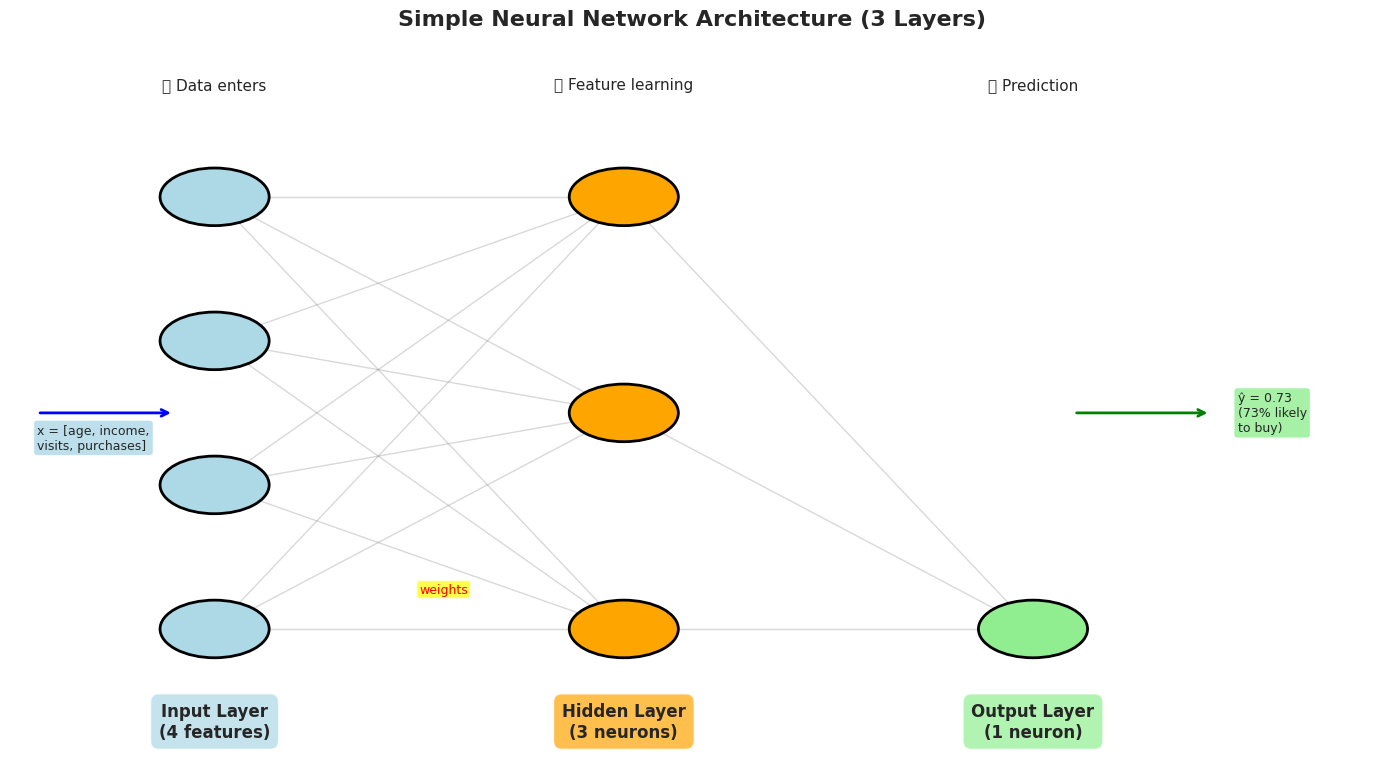

🔍 NEURAL NETWORK STRUCTURE:
Input Layer:  4 neurons (= 4 features)
Hidden Layer: 3 neurons (learns intermediate representations)
Output Layer: 1 neuron (binary prediction: 0 or 1)

📊 Parameters to learn:
  Weights: (4×3) + (3×1) = 15 weights
  Biases:  3 + 1 = 4 biases
  Total:   19 parameters

💡 More layers & neurons = more capacity but also more risk of overfitting!


In [5]:
# Visualize a simple neural network architecture
fig, ax = plt.subplots(figsize=(14, 8))

# Layer positions
layer_positions = [0.15, 0.45, 0.75]
layer_names = ['Input Layer\n(4 features)', 'Hidden Layer\n(3 neurons)', 'Output Layer\n(1 neuron)']
layer_sizes = [4, 3, 1]
layer_colors = ['lightblue', 'orange', 'lightgreen']

# Store neuron positions for drawing connections
neuron_positions = []

# Draw layers
for layer_idx, (x_pos, size, color, name) in enumerate(zip(layer_positions, layer_sizes, layer_colors, layer_names)):
    layer_neurons = []
    y_positions = np.linspace(0.2, 0.8, size)
    
    for y_pos in y_positions:
        circle = plt.Circle((x_pos, y_pos), 0.04, color=color, ec='black', linewidth=2, zorder=3)
        ax.add_patch(circle)
        layer_neurons.append((x_pos, y_pos))
    
    neuron_positions.append(layer_neurons)
    
    # Layer label
    ax.text(x_pos, 0.05, name, fontsize=12, ha='center', weight='bold',
            bbox=dict(boxstyle='round,pad=0.5', facecolor=color, alpha=0.7))

# Draw connections between layers
for i in range(len(neuron_positions) - 1):
    for x1, y1 in neuron_positions[i]:
        for x2, y2 in neuron_positions[i + 1]:
            ax.plot([x1, x2], [y1, y2], 'gray', alpha=0.3, linewidth=1)

# Add weight annotation on one connection
if len(neuron_positions) > 1:
    x1, y1 = neuron_positions[0][0]
    x2, y2 = neuron_positions[1][0]
    mid_x, mid_y = (x1 + x2) / 2, (y1 + y2) / 2
    ax.text(mid_x, mid_y + 0.05, 'weights', fontsize=9, color='red',
            bbox=dict(boxstyle='round,pad=0.2', facecolor='yellow', alpha=0.7))

# Add annotations
ax.text(0.15, 0.95, '📥 Data enters', fontsize=11, ha='center')
ax.text(0.45, 0.95, '🔄 Feature learning', fontsize=11, ha='center')
ax.text(0.75, 0.95, '📤 Prediction', fontsize=11, ha='center')

# Add example data flow
ax.annotate('', xy=(0.12, 0.5), xytext=(0.02, 0.5),
            arrowprops=dict(arrowstyle='->', lw=2, color='blue'))
ax.text(0.02, 0.45, 'x = [age, income,\nvisits, purchases]', fontsize=9, 
        bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

ax.annotate('', xy=(0.88, 0.5), xytext=(0.78, 0.5),
            arrowprops=dict(arrowstyle='->', lw=2, color='green'))
ax.text(0.90, 0.5, 'ŷ = 0.73\n(73% likely\nto buy)', fontsize=9, va='center',
        bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')
ax.set_title('Simple Neural Network Architecture (3 Layers)', fontsize=16, weight='bold', pad=20)
plt.tight_layout()
plt.show()

print("🔍 NEURAL NETWORK STRUCTURE:")
print("=" * 60)
print("Input Layer:  4 neurons (= 4 features)")
print("Hidden Layer: 3 neurons (learns intermediate representations)")
print("Output Layer: 1 neuron (binary prediction: 0 or 1)")
print("\n📊 Parameters to learn:")
print(f"  Weights: (4×3) + (3×1) = {4*3 + 3*1} weights")
print(f"  Biases:  3 + 1 = {3 + 1} biases")
print(f"  Total:   {4*3 + 3*1 + 3 + 1} parameters")
print("\n💡 More layers & neurons = more capacity but also more risk of overfitting!")

## 2. Training Neural Networks

Now that we understand the architecture, let's learn how neural networks actually **learn** from data.

### 2.1 Loss Functions: Measuring "Wrongness"

The **loss function** (or cost function) measures how far the model's predictions are from the true values. During training, we try to **minimize** this loss.

**Common Loss Functions:**

1. **Binary Cross-Entropy** (for binary classification: yes/no, 0/1)
   - Formula: `L = -[y·log(ŷ) + (1-y)·log(1-ŷ)]`
   - Penalizes confident wrong predictions heavily
   
2. **Categorical Cross-Entropy** (for multi-class: cat/dog/bird)
   - Formula: `L = -Σ yᵢ·log(ŷᵢ)`
   - Compares predicted probability distribution with true distribution

3. **Mean Squared Error (MSE)** (for regression: predicting continuous values)
   - Formula: `L = (y - ŷ)²`
   - Measures squared difference

Let's visualize how binary cross-entropy loss behaves:

/tmp/ipykernel_3382/434410301.py:44: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3382/434410301.py:44: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/workspaces/ml101/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/workspaces/ml101/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


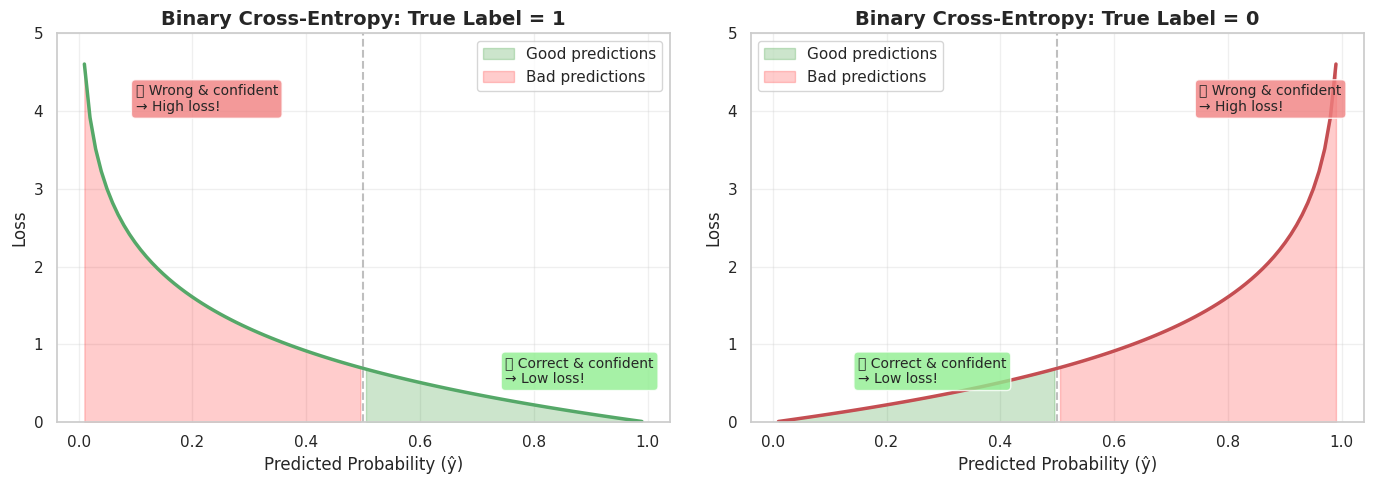

📊 BINARY CROSS-ENTROPY EXAMPLES:
True=1, Predicted=0.9 → Loss=0.105 (Correct & confident)
True=1, Predicted=0.6 → Loss=0.511 (Correct but uncertain)
True=1, Predicted=0.2 → Loss=1.609 (Wrong & confident)
True=0, Predicted=0.1 → Loss=0.105 (Correct & confident)
True=0, Predicted=0.8 → Loss=1.609 (Wrong & confident)

💡 Key Insight: Model learns to minimize loss by adjusting weights!


In [6]:
# Visualize Binary Cross-Entropy Loss
y_pred = np.linspace(0.01, 0.99, 100)

# Loss for y=1 (true label is 1)
loss_y1 = -np.log(y_pred)

# Loss for y=0 (true label is 0)
loss_y0 = -np.log(1 - y_pred)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Loss when true label is 1
axes[0].plot(y_pred, loss_y1, 'g-', linewidth=2.5)
axes[0].axvline(0.5, color='gray', linestyle='--', alpha=0.5)
axes[0].fill_between(y_pred, 0, loss_y1, where=(y_pred > 0.5), alpha=0.2, color='green', label='Good predictions')
axes[0].fill_between(y_pred, 0, loss_y1, where=(y_pred <= 0.5), alpha=0.2, color='red', label='Bad predictions')
axes[0].set_xlabel('Predicted Probability (ŷ)', fontsize=12)
axes[0].set_ylabel('Loss', fontsize=12)
axes[0].set_title('Binary Cross-Entropy: True Label = 1', fontsize=14, weight='bold')
axes[0].set_ylim(0, 5)
axes[0].grid(True, alpha=0.3)
axes[0].legend()
axes[0].text(0.1, 4, '❌ Wrong & confident\n→ High loss!', fontsize=10, 
            bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.8))
axes[0].text(0.75, 0.5, '✅ Correct & confident\n→ Low loss!', fontsize=10,
            bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))

# Loss when true label is 0
axes[1].plot(y_pred, loss_y0, 'r-', linewidth=2.5)
axes[1].axvline(0.5, color='gray', linestyle='--', alpha=0.5)
axes[1].fill_between(y_pred, 0, loss_y0, where=(y_pred < 0.5), alpha=0.2, color='green', label='Good predictions')
axes[1].fill_between(y_pred, 0, loss_y0, where=(y_pred >= 0.5), alpha=0.2, color='red', label='Bad predictions')
axes[1].set_xlabel('Predicted Probability (ŷ)', fontsize=12)
axes[1].set_ylabel('Loss', fontsize=12)
axes[1].set_title('Binary Cross-Entropy: True Label = 0', fontsize=14, weight='bold')
axes[1].set_ylim(0, 5)
axes[1].grid(True, alpha=0.3)
axes[1].legend()
axes[1].text(0.75, 4, '❌ Wrong & confident\n→ High loss!', fontsize=10,
            bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.8))
axes[1].text(0.15, 0.5, '✅ Correct & confident\n→ Low loss!', fontsize=10,
            bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))

plt.tight_layout()
plt.show()

# Example calculations
print("📊 BINARY CROSS-ENTROPY EXAMPLES:")
print("=" * 60)

examples = [
    (1, 0.9, "Correct & confident"),
    (1, 0.6, "Correct but uncertain"),
    (1, 0.2, "Wrong & confident"),
    (0, 0.1, "Correct & confident"),
    (0, 0.8, "Wrong & confident"),
]

for y_true, y_pred_val, description in examples:
    if y_true == 1:
        loss = -np.log(y_pred_val)
    else:
        loss = -np.log(1 - y_pred_val)
    print(f"True={y_true}, Predicted={y_pred_val:.1f} → Loss={loss:.3f} ({description})")

print("\n💡 Key Insight: Model learns to minimize loss by adjusting weights!")

### 2.2 Gradient Descent: Finding the Minimum

**Gradient Descent** is the optimization algorithm that adjusts weights to minimize loss.

**Analogy:** Imagine you're on a foggy mountain and want to reach the valley (minimum loss). You:
1. Look around and find the steepest downward slope (gradient)
2. Take a step in that direction (update weights)
3. Repeat until you reach the bottom

**Mathematical Update Rule:**
```
new_weight = old_weight - learning_rate × gradient
```

**Learning Rate**: Controls step size
- Too small → slow learning
- Too large → may overshoot minimum

Let's visualize this process:

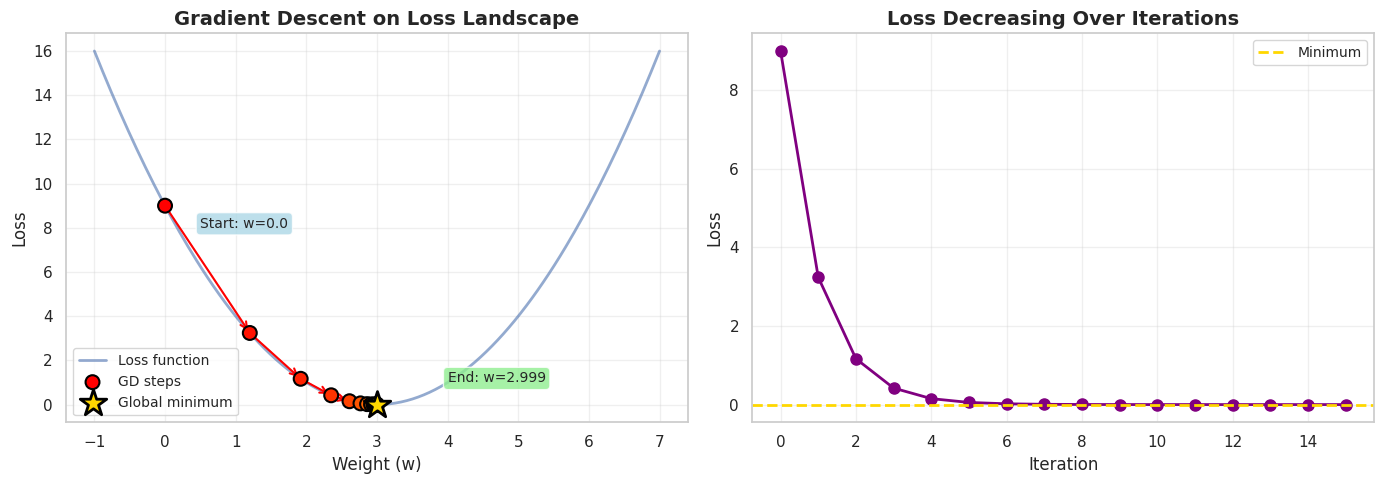

📉 GRADIENT DESCENT PROGRESS:
Iteration  0: w =  0.000, loss =  9.000
Iteration  3: w =  2.352, loss =  0.420
Iteration  6: w =  2.860, loss =  0.020
Iteration  9: w =  2.970, loss =  0.001
Iteration 12: w =  2.993, loss =  0.000
Iteration 15: w =  2.999, loss =  0.000

💡 The weight converges to w=3.0, where the loss is minimized!


In [11]:
# Visualize Gradient Descent on a simple 2D loss function
def loss_function(w):
    """Simple quadratic loss: (w - 3)^2"""
    return (w - 3) ** 2

def gradient(w):
    """Derivative of (w - 3)^2 is 2(w - 3)"""
    return 2 * (w - 3)

# Gradient descent parameters
w_start = 0.0
learning_rate = 0.2
epochs = 15

# Track history
w_history = [w_start]
loss_history = [loss_function(w_start)]

w = w_start
for epoch in range(epochs):
    grad = gradient(w)
    w = w - learning_rate * grad
    w_history.append(w)
    loss_history.append(loss_function(w))

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left: Loss landscape with gradient descent path
w_range = np.linspace(-1, 7, 200)
loss_range = loss_function(w_range)

axes[0].plot(w_range, loss_range, 'b-', linewidth=2, alpha=0.6, label='Loss function')
axes[0].scatter(w_history, loss_history, c=range(len(w_history)), cmap='autumn', 
                s=100, edgecolor='black', linewidth=1.5, zorder=5, label='GD steps')
axes[0].plot(w_history, loss_history, 'r--', alpha=0.5, linewidth=1)

# Add arrows to show direction
for i in range(min(5, len(w_history)-1)):
    axes[0].annotate('', xy=(w_history[i+1], loss_history[i+1]), 
                    xytext=(w_history[i], loss_history[i]),
                    arrowprops=dict(arrowstyle='->', lw=1.5, color='red'))

axes[0].scatter([3], [0], marker='*', s=400, color='gold', edgecolor='black', 
                linewidth=2, zorder=6, label='Global minimum')
axes[0].set_xlabel('Weight (w)', fontsize=12)
axes[0].set_ylabel('Loss', fontsize=12)
axes[0].set_title('Gradient Descent on Loss Landscape', fontsize=14, weight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)
axes[0].text(0.5, 8, f'Start: w={w_start}', fontsize=10, 
            bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))
axes[0].text(4, 1, f'End: w={w_history[-1]:.3f}', fontsize=10,
            bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))

# Right: Loss over iterations
axes[1].plot(range(len(loss_history)), loss_history, 'o-', linewidth=2, markersize=8, 
            color='purple')
axes[1].axhline(0, color='gold', linestyle='--', linewidth=2, label='Minimum')
axes[1].set_xlabel('Iteration', fontsize=12)
axes[1].set_ylabel('Loss', fontsize=12)
axes[1].set_title('Loss Decreasing Over Iterations', fontsize=14, weight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].legend(fontsize=10)

plt.tight_layout()
plt.show()

print("📉 GRADIENT DESCENT PROGRESS:")
print("=" * 60)
for i in range(0, len(w_history), 3):
    print(f"Iteration {i:2d}: w = {w_history[i]:6.3f}, loss = {loss_history[i]:6.3f}")
print("\n💡 The weight converges to w=3.0, where the loss is minimized!")

### 2.3 Backpropagation & Training Dynamics

**Backpropagation** is the algorithm that computes gradients for all weights in the network by working backwards from the output layer to the input layer.

**The Training Loop:**
```
for each epoch:
    for each batch of data:
        1. Forward pass: compute predictions
        2. Compute loss: how wrong are we?
        3. Backward pass (backprop): compute gradients
        4. Update weights: gradient descent step
```

**Key Concepts:**

- **Epoch**: One complete pass through the entire training dataset
- **Batch Size**: Number of samples processed before updating weights
  - Mini-batch GD: Use small batches (e.g., 32, 64) - most common
  - Batch GD: Use entire dataset - slow for large data
  - Stochastic GD: Use single sample - noisy updates
  
- **Training vs Validation Loss**:
  - **Training loss**: Performance on data the model sees during training
  - **Validation loss**: Performance on held-out data
  - **Gap between them**: Indicates overfitting if validation loss >> training loss

Let's visualize what good and bad training looks like:

/tmp/ipykernel_3382/3644566086.py:52: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3382/3644566086.py:52: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


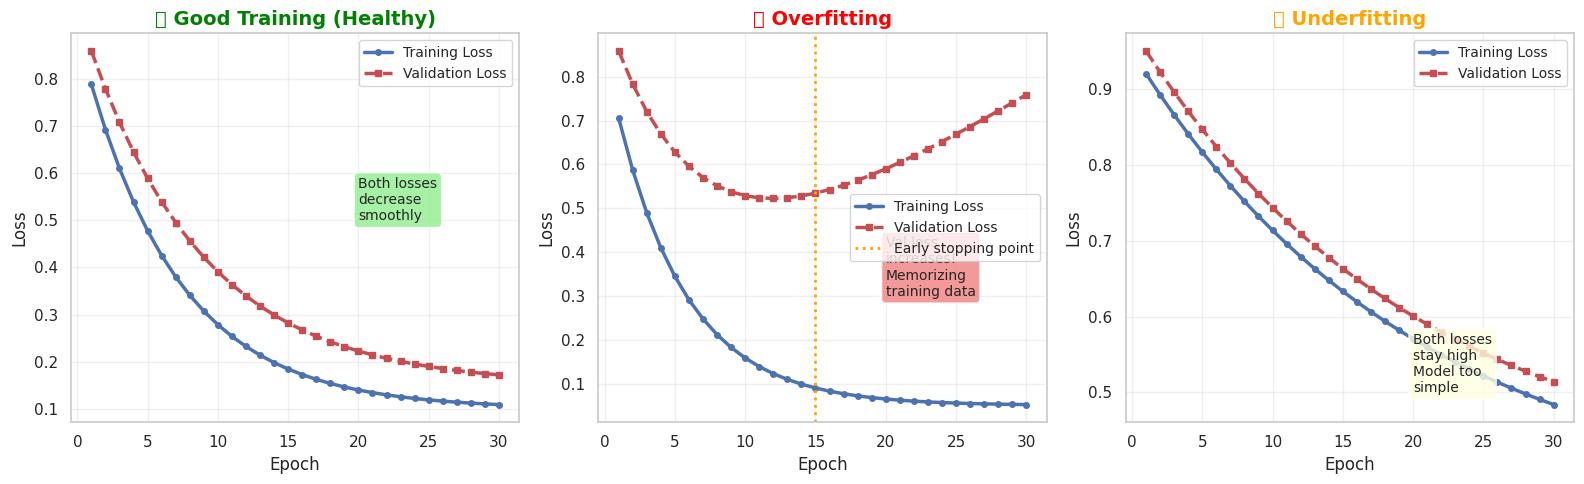

📊 TRAINING SCENARIOS:
✅ Good Training:
   • Both losses decrease steadily
   • Small gap between training and validation
   • Model generalizes well to unseen data

❌ Overfitting:
   • Training loss keeps decreasing
   • Validation loss starts increasing
   • Model memorizes training data, poor generalization
   • Solutions: regularization, dropout, early stopping, more data

❌ Underfitting:
   • Both losses remain high
   • Model is too simple to capture patterns
   • Solutions: more layers/neurons, train longer, reduce regularization


In [13]:
# Simulate different training scenarios
epochs = np.arange(1, 31)

# Scenario 1: Good training (healthy)
train_loss_good = 0.8 * np.exp(-0.15 * epochs) + 0.1
val_loss_good = 0.8 * np.exp(-0.12 * epochs) + 0.15

# Scenario 2: Overfitting
train_loss_overfit = 0.8 * np.exp(-0.2 * epochs) + 0.05
val_loss_overfit = 0.8 * np.exp(-0.15 * epochs) + 0.15 + 0.02 * epochs

# Scenario 3: Underfitting
train_loss_underfit = 0.6 * np.exp(-0.05 * epochs) + 0.35
val_loss_underfit = 0.6 * np.exp(-0.05 * epochs) + 0.38

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Good training
axes[0].plot(epochs, train_loss_good, 'b-', linewidth=2.5, label='Training Loss', marker='o', markersize=4)
axes[0].plot(epochs, val_loss_good, 'r--', linewidth=2.5, label='Validation Loss', marker='s', markersize=4)
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Loss', fontsize=12)
axes[0].set_title('✅ Good Training (Healthy)', fontsize=14, weight='bold', color='green')
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)
axes[0].text(20, 0.5, 'Both losses\ndecrease\nsmoothly', fontsize=10,
            bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))

# Overfitting
axes[1].plot(epochs, train_loss_overfit, 'b-', linewidth=2.5, label='Training Loss', marker='o', markersize=4)
axes[1].plot(epochs, val_loss_overfit, 'r--', linewidth=2.5, label='Validation Loss', marker='s', markersize=4)
axes[1].axvline(15, color='orange', linestyle=':', linewidth=2, label='Early stopping point')
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Loss', fontsize=12)
axes[1].set_title('❌ Overfitting', fontsize=14, weight='bold', color='red')
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)
axes[1].text(20, 0.3, 'Val loss\nincreases!\nMemorizing\ntraining data', fontsize=10,
            bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.8))

# Underfitting
axes[2].plot(epochs, train_loss_underfit, 'b-', linewidth=2.5, label='Training Loss', marker='o', markersize=4)
axes[2].plot(epochs, val_loss_underfit, 'r--', linewidth=2.5, label='Validation Loss', marker='s', markersize=4)
axes[2].set_xlabel('Epoch', fontsize=12)
axes[2].set_ylabel('Loss', fontsize=12)
axes[2].set_title('❌ Underfitting', fontsize=14, weight='bold', color='orange')
axes[2].legend(fontsize=10)
axes[2].grid(True, alpha=0.3)
axes[2].text(20, 0.5, 'Both losses\nstay high\nModel too\nsimple', fontsize=10,
            bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))

plt.tight_layout()
plt.show()

print("📊 TRAINING SCENARIOS:")
print("=" * 60)
print("✅ Good Training:")
print("   • Both losses decrease steadily")
print("   • Small gap between training and validation")
print("   • Model generalizes well to unseen data")
print("\n❌ Overfitting:")
print("   • Training loss keeps decreasing")
print("   • Validation loss starts increasing")
print("   • Model memorizes training data, poor generalization")
print("   • Solutions: regularization, dropout, early stopping, more data")
print("\n❌ Underfitting:")
print("   • Both losses remain high")
print("   • Model is too simple to capture patterns")
print("   • Solutions: more layers/neurons, train longer, reduce regularization")

## 3. Hands-On: Binary Classification with PyTorch

Now let's put everything into practice! We'll build a neural network to predict Titanic passenger survival using PyTorch.

**Problem:** Given passenger information (age, sex, class, fare, etc.), predict if they survived.

**Steps:**
1. Load and preprocess the data
2. Build a neural network model
3. Train the model
4. Evaluate performance
5. Compare with traditional ML (Logistic Regression)

### 3.1 Data Preparation

In [14]:
# Load Titanic dataset
df = sns.load_dataset('titanic')

print("📊 TITANIC DATASET")
print(f"Shape: {df.shape}")
print(f"Survival rate: {df['survived'].mean():.1%}")
print(f"\nFirst few rows:")
df.head()

📊 TITANIC DATASET
Shape: (891, 15)
Survival rate: 38.4%

First few rows:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [15]:
# Preprocess the data
df_clean = df.copy()

# Handle missing values
df_clean['age'] = df_clean.groupby(['sex', 'class'])['age'].transform(
    lambda x: x.fillna(x.median())
)
df_clean['embarked'] = df_clean['embarked'].fillna(df_clean['embarked'].mode()[0])
df_clean['embark_town'] = df_clean['embark_town'].fillna(df_clean['embark_town'].mode()[0])

# Drop columns with too many missing values
df_clean = df_clean.drop(['deck', 'alive'], axis=1)

# Select features
feature_columns = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']

# Feature engineering
df_clean['family_size'] = df_clean['sibsp'] + df_clean['parch'] + 1
df_clean['is_alone'] = (df_clean['family_size'] == 1).astype(int)

feature_columns.extend(['family_size', 'is_alone'])

X = df_clean[feature_columns].copy()
y = df_clean['survived'].values

# Encode categorical variables
label_encoders = {}
for feature in ['sex', 'embarked']:
    le = LabelEncoder()
    X[feature] = le.fit_transform(X[feature])
    label_encoders[feature] = le

print("✅ Data preprocessing complete!")
print(f"Features: {X.shape[1]}")
print(f"Samples: {X.shape[0]}")
print(f"Feature names: {list(X.columns)}")

✅ Data preprocessing complete!
Features: 9
Samples: 891
Feature names: ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'family_size', 'is_alone']


/tmp/ipykernel_3382/333566340.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_clean['age'] = df_clean.groupby(['sex', 'class'])['age'].transform(


In [16]:
# Split data: 60% train, 20% validation, 20% test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp  # 0.25 * 0.8 = 0.2
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_scaled).to(device)
y_train_tensor = torch.FloatTensor(y_train).to(device)

X_val_tensor = torch.FloatTensor(X_val_scaled).to(device)
y_val_tensor = torch.FloatTensor(y_val).to(device)

X_test_tensor = torch.FloatTensor(X_test_scaled).to(device)
y_test_tensor = torch.FloatTensor(y_test).to(device)

print("📊 DATA SPLIT:")
print(f"Training:   {X_train_tensor.shape[0]} samples ({X_train_tensor.shape[0]/len(X)*100:.1f}%)")
print(f"Validation: {X_val_tensor.shape[0]} samples ({X_val_tensor.shape[0]/len(X)*100:.1f}%)")
print(f"Test:       {X_test_tensor.shape[0]} samples ({X_test_tensor.shape[0]/len(X)*100:.1f}%)")
print(f"\n✅ Data converted to PyTorch tensors on {device}")

📊 DATA SPLIT:
Training:   534 samples (59.9%)
Validation: 178 samples (20.0%)
Test:       179 samples (20.1%)

✅ Data converted to PyTorch tensors on cpu


### 3.2 Build the Neural Network Model

We'll create a simple feedforward neural network with:
- Input layer: 9 features
- Hidden layer 1: 16 neurons with ReLU activation
- Hidden layer 2: 8 neurons with ReLU activation  
- Output layer: 1 neuron with Sigmoid activation (for binary classification)

In [17]:
# Define the neural network architecture
class TitanicNet(nn.Module):
    def __init__(self, input_size):
        super(TitanicNet, self).__init__()
        # Define layers
        self.fc1 = nn.Linear(input_size, 16)  # Input to hidden layer 1
        self.fc2 = nn.Linear(16, 8)            # Hidden layer 1 to hidden layer 2
        self.fc3 = nn.Linear(8, 1)             # Hidden layer 2 to output
        self.relu = nn.ReLU()                  # ReLU activation
        self.sigmoid = nn.Sigmoid()            # Sigmoid for output
        
    def forward(self, x):
        # Forward propagation
        x = self.relu(self.fc1(x))  # Hidden layer 1 with ReLU
        x = self.relu(self.fc2(x))  # Hidden layer 2 with ReLU
        x = self.sigmoid(self.fc3(x))  # Output with Sigmoid
        return x

# Create model instance
input_size = X_train_tensor.shape[1]
model = TitanicNet(input_size).to(device)

# Count parameters
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

print("🧠 NEURAL NETWORK ARCHITECTURE:")
print("=" * 60)
print(model)
print("=" * 60)
print(f"Total parameters: {total_params}")
print(f"Trainable parameters: {trainable_params}")
print("\n💡 Architecture: 9 → 16 → 8 → 1")
print("   ReLU activations in hidden layers, Sigmoid in output")

🧠 NEURAL NETWORK ARCHITECTURE:
TitanicNet(
  (fc1): Linear(in_features=9, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=8, bias=True)
  (fc3): Linear(in_features=8, out_features=1, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
)
Total parameters: 305
Trainable parameters: 305

💡 Architecture: 9 → 16 → 8 → 1
   ReLU activations in hidden layers, Sigmoid in output


### 3.3 Train the Model

In [18]:
# Define loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer

# Training parameters
epochs = 100
batch_size = 32

# Create data loaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Storage for training history
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

print("🚀 TRAINING NEURAL NETWORK...")
print("=" * 60)

# Training loop
for epoch in range(epochs):
    # Training phase
    model.train()
    train_loss = 0.0
    train_correct = 0
    train_total = 0
    
    for batch_X, batch_y in train_loader:
        # Forward pass
        outputs = model(batch_X).squeeze()
        loss = criterion(outputs, batch_y)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Track metrics
        train_loss += loss.item() * batch_X.size(0)
        predicted = (outputs >= 0.5).float()
        train_correct += (predicted == batch_y).sum().item()
        train_total += batch_y.size(0)
    
    # Calculate training metrics
    train_loss = train_loss / train_total
    train_accuracy = train_correct / train_total
    
    # Validation phase
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_tensor).squeeze()
        val_loss = criterion(val_outputs, y_val_tensor).item()
        val_predicted = (val_outputs >= 0.5).float()
        val_accuracy = (val_predicted == y_val_tensor).float().mean().item()
    
    # Store history
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    
    # Print progress every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1:3d}/{epochs}] | "
              f"Train Loss: {train_loss:.4f} | Train Acc: {train_accuracy:.4f} | "
              f"Val Loss: {val_loss:.4f} | Val Acc: {val_accuracy:.4f}")

print("\n✅ Training complete!")

🚀 TRAINING NEURAL NETWORK...
Epoch [ 10/100] | Train Loss: 0.5567 | Train Acc: 0.6161 | Val Loss: 0.5467 | Val Acc: 0.6180
Epoch [ 20/100] | Train Loss: 0.5277 | Train Acc: 0.6161 | Val Loss: 0.5178 | Val Acc: 0.6180
Epoch [ 10/100] | Train Loss: 0.5567 | Train Acc: 0.6161 | Val Loss: 0.5467 | Val Acc: 0.6180
Epoch [ 20/100] | Train Loss: 0.5277 | Train Acc: 0.6161 | Val Loss: 0.5178 | Val Acc: 0.6180
Epoch [ 30/100] | Train Loss: 0.5094 | Train Acc: 0.8240 | Val Loss: 0.5002 | Val Acc: 0.8202
Epoch [ 40/100] | Train Loss: 0.4946 | Train Acc: 0.8333 | Val Loss: 0.4868 | Val Acc: 0.8315
Epoch [ 30/100] | Train Loss: 0.5094 | Train Acc: 0.8240 | Val Loss: 0.5002 | Val Acc: 0.8202
Epoch [ 40/100] | Train Loss: 0.4946 | Train Acc: 0.8333 | Val Loss: 0.4868 | Val Acc: 0.8315
Epoch [ 50/100] | Train Loss: 0.4810 | Train Acc: 0.8240 | Val Loss: 0.4755 | Val Acc: 0.8202
Epoch [ 60/100] | Train Loss: 0.4686 | Train Acc: 0.8277 | Val Loss: 0.4653 | Val Acc: 0.8258
Epoch [ 50/100] | Train Loss: 0

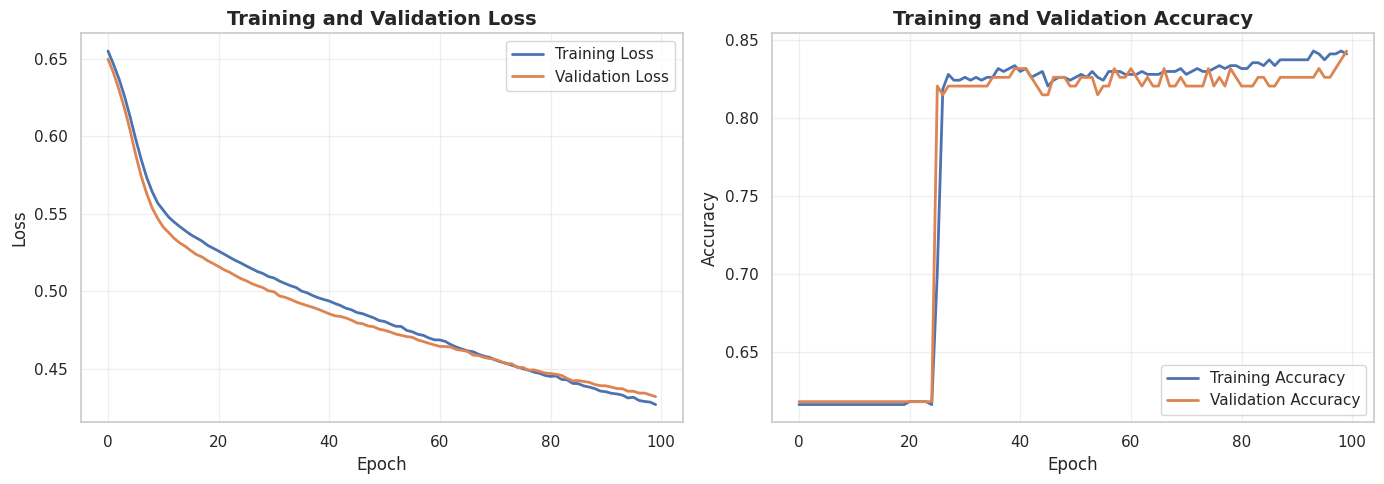

📊 FINAL TRAINING METRICS:
Training Loss:      0.4268
Validation Loss:    0.4319
Training Accuracy:  0.8408
Validation Accuracy: 0.8427


In [19]:
# Plot training history
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Loss curves
axes[0].plot(train_losses, label='Training Loss', linewidth=2)
axes[0].plot(val_losses, label='Validation Loss', linewidth=2)
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Loss', fontsize=12)
axes[0].set_title('Training and Validation Loss', fontsize=14, weight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Accuracy curves
axes[1].plot(train_accuracies, label='Training Accuracy', linewidth=2)
axes[1].plot(val_accuracies, label='Validation Accuracy', linewidth=2)
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Accuracy', fontsize=12)
axes[1].set_title('Training and Validation Accuracy', fontsize=14, weight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("📊 FINAL TRAINING METRICS:")
print(f"Training Loss:      {train_losses[-1]:.4f}")
print(f"Validation Loss:    {val_losses[-1]:.4f}")
print(f"Training Accuracy:  {train_accuracies[-1]:.4f}")
print(f"Validation Accuracy: {val_accuracies[-1]:.4f}")

### 3.4 Evaluate on Test Set

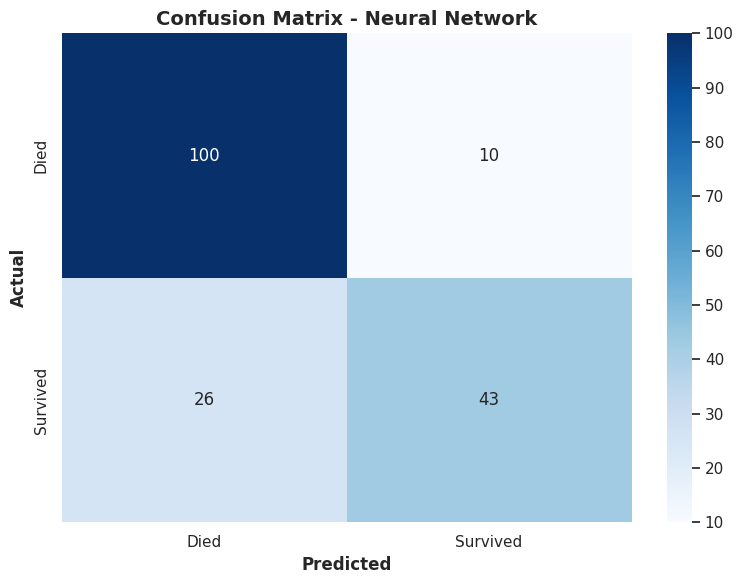

📊 TEST SET PERFORMANCE:
Test Accuracy: 0.7989 (79.89%)

Detailed Classification Report:
              precision    recall  f1-score   support

        Died       0.79      0.91      0.85       110
    Survived       0.81      0.62      0.70        69

    accuracy                           0.80       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.80      0.80      0.79       179



In [20]:
# Evaluate on test set
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor).squeeze()
    test_predicted = (test_outputs >= 0.5).float()
    test_accuracy = (test_predicted == y_test_tensor).float().mean().item()

# Get predictions for confusion matrix
y_test_pred = test_predicted.cpu().numpy()
y_test_true = y_test_tensor.cpu().numpy()

# Confusion matrix
cm = confusion_matrix(y_test_true, y_test_pred)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=True,
            xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'])
ax.set_xlabel('Predicted', fontsize=12, weight='bold')
ax.set_ylabel('Actual', fontsize=12, weight='bold')
ax.set_title('Confusion Matrix - Neural Network', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

# Classification report
print("📊 TEST SET PERFORMANCE:")
print("=" * 60)
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print("\nDetailed Classification Report:")
print(classification_report(y_test_true, y_test_pred, 
                          target_names=['Died', 'Survived']))

### 3.5 Compare with Logistic Regression

Let's compare our neural network with a traditional logistic regression model to see if the added complexity is worth it.

In [21]:
# Train Logistic Regression for comparison
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# Predictions
lr_test_pred = lr_model.predict(X_test_scaled)
lr_test_accuracy = accuracy_score(y_test, lr_test_pred)

# Compare models
comparison_df = pd.DataFrame({
    'Model': ['Neural Network', 'Logistic Regression'],
    'Test Accuracy': [test_accuracy, lr_test_accuracy],
    'Parameters': [total_params, X_train_scaled.shape[1] + 1]  # LR has weights + bias
})

print("📊 MODEL COMPARISON:")
print("=" * 60)
print(comparison_df.to_string(index=False))
print("\n💡 Insights:")
print(f"  • Neural Network has {total_params} parameters")
print(f"  • Logistic Regression has {X_train_scaled.shape[1] + 1} parameters")
print(f"  • Accuracy difference: {abs(test_accuracy - lr_test_accuracy):.4f}")

if test_accuracy > lr_test_accuracy:
    print(f"  • Neural Network performs better (+{(test_accuracy - lr_test_accuracy)*100:.2f}%)")
else:
    print(f"  • Logistic Regression performs better (+{(lr_test_accuracy - test_accuracy)*100:.2f}%)")

print("\n🎯 For this relatively small tabular dataset, both models perform similarly.")
print("   Neural networks shine with larger datasets and more complex patterns!")

📊 MODEL COMPARISON:
              Model  Test Accuracy  Parameters
     Neural Network       0.798883         305
Logistic Regression       0.804469          10

💡 Insights:
  • Neural Network has 305 parameters
  • Logistic Regression has 10 parameters
  • Accuracy difference: 0.0056
  • Logistic Regression performs better (+0.56%)

🎯 For this relatively small tabular dataset, both models perform similarly.
   Neural networks shine with larger datasets and more complex patterns!


## 4. Hands-On: Multi-Class Classification with MNIST

Now let's tackle a more challenging problem: recognizing handwritten digits (0-9) from images!

**MNIST Dataset:**
- 70,000 images of handwritten digits
- 28×28 pixels, grayscale
- 10 classes (digits 0-9)
- The "Hello World" of deep learning

**Key Differences from Binary Classification:**
- Output layer: 10 neurons (one per class) with **Softmax** activation
- Loss function: **Categorical Cross-Entropy**
- More complex patterns to learn from pixel data

### 4.1 Load and Explore MNIST Dataset

In [24]:
# Load MNIST dataset using torchvision
from torchvision import datasets, transforms

# Download and load MNIST
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert to tensor and scale to [0, 1]
])

# Download datasets
mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
mnist_test = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

print("📊 MNIST DATASET:")
print("=" * 60)
print(f"Training samples: {len(mnist_train)}")
print(f"Test samples: {len(mnist_test)}")
print(f"Image shape: {mnist_train[0][0].shape} (channels, height, width)")
print(f"Number of classes: {len(mnist_train.classes)}")
print(f"Classes: {mnist_train.classes}")

100%|██████████| 9.91M/9.91M [00:03<00:00, 2.49MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 248kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 2.20MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 2.22MB/s]

📊 MNIST DATASET:
Training samples: 60000
Test samples: 10000
Image shape: torch.Size([1, 28, 28]) (channels, height, width)
Number of classes: 10
Classes: ['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']


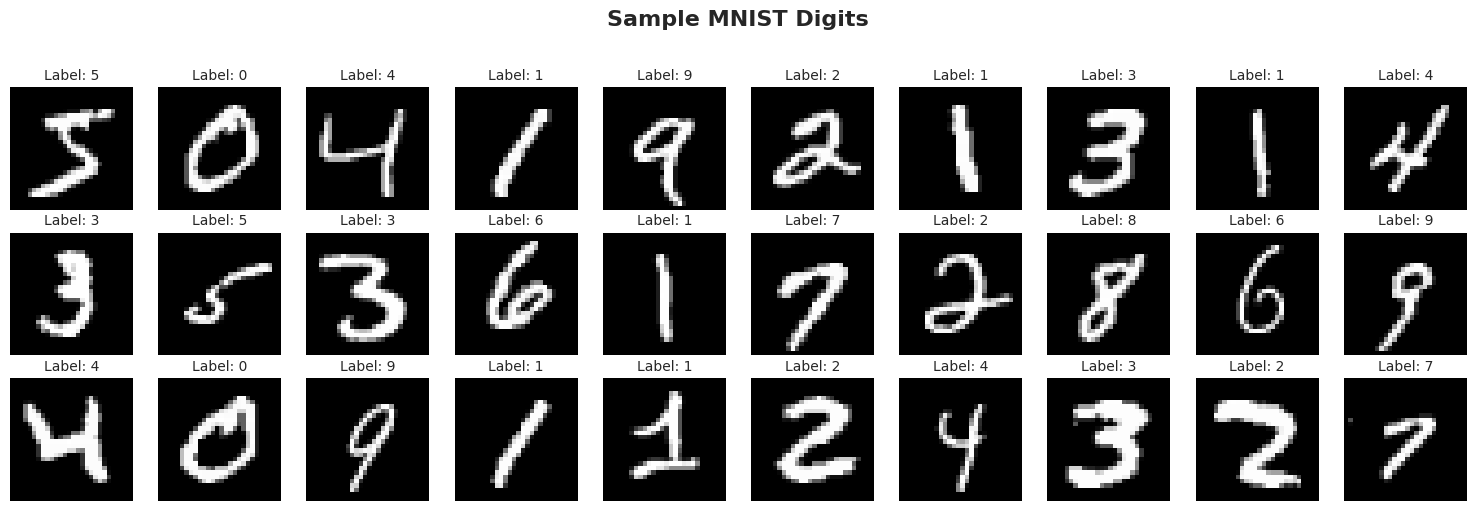

🔍 Each image:
  • Size: 28×28 pixels
  • Pixel values: 0 (black) to 1 (white)
  • Total pixels per image: 784 = 784 features


In [25]:
# Visualize sample digits
fig, axes = plt.subplots(3, 10, figsize=(15, 5))
fig.suptitle('Sample MNIST Digits', fontsize=16, weight='bold', y=1.02)

for i in range(30):
    ax = axes[i // 10, i % 10]
    image, label = mnist_train[i]
    
    # Convert tensor to numpy and squeeze channel dimension
    img = image.squeeze().numpy()
    
    ax.imshow(img, cmap='gray')
    ax.set_title(f'Label: {label}', fontsize=10)
    ax.axis('off')

plt.tight_layout()
plt.show()

print("🔍 Each image:")
print(f"  • Size: 28×28 pixels")
print(f"  • Pixel values: 0 (black) to 1 (white)")
print(f"  • Total pixels per image: {28*28} = 784 features")

### 4.2 Prepare Data for Training

In [26]:
# Create data loaders for efficient batching
batch_size = 128

train_loader_mnist = DataLoader(mnist_train, batch_size=batch_size, shuffle=True)
test_loader_mnist = DataLoader(mnist_test, batch_size=batch_size, shuffle=False)

# Split train into train and validation
train_size = int(0.8 * len(mnist_train))
val_size = len(mnist_train) - train_size

mnist_train_subset, mnist_val_subset = torch.utils.data.random_split(
    mnist_train, [train_size, val_size], generator=torch.Generator().manual_seed(42)
)

train_loader = DataLoader(mnist_train_subset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(mnist_val_subset, batch_size=batch_size, shuffle=False)

print("📊 DATA LOADERS READY:")
print("=" * 60)
print(f"Training batches:   {len(train_loader)} (batch size: {batch_size})")
print(f"Validation batches: {len(val_loader)} (batch size: {batch_size})")
print(f"Test batches:       {len(test_loader_mnist)} (batch size: {batch_size})")
print(f"\nTotal samples:")
print(f"  Train:      {len(mnist_train_subset)}")
print(f"  Validation: {len(mnist_val_subset)}")
print(f"  Test:       {len(mnist_test)}")

📊 DATA LOADERS READY:
Training batches:   375 (batch size: 128)
Validation batches: 94 (batch size: 128)
Test batches:       79 (batch size: 128)

Total samples:
  Train:      48000
  Validation: 12000
  Test:       10000


### 4.3 Build the MNIST Neural Network

We'll create a deeper network with:
- Input: 784 features (28×28 flattened pixels)
- Hidden layer 1: 128 neurons with ReLU + Dropout(0.2)
- Hidden layer 2: 64 neurons with ReLU + Dropout(0.2)
- Output: 10 neurons with Softmax (one per digit)

**Dropout** randomly sets some neurons to zero during training to prevent overfitting.

In [38]:
# Define MNIST neural network
class MNISTNet(nn.Module):
    def __init__(self):
        super(MNISTNet, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)  # 784 input features
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)        # 10 output classes
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.2)
        
    def forward(self, x):
        # Flatten image: (batch, 1, 28, 28) -> (batch, 784)
        x = x.view(-1, 28 * 28)
        
        # Hidden layer 1
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        # Hidden layer 2
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        # Output layer (no softmax here, CrossEntropyLoss applies it)
        x = self.fc3(x)
        return x

# Create model
mnist_model = MNISTNet().to(device)

# Count parameters
total_params_mnist = sum(p.numel() for p in mnist_model.parameters())

print("🧠 MNIST NEURAL NETWORK:")
print("=" * 60)
print(mnist_model)
print("=" * 60)
print(f"Total parameters: {total_params_mnist:,}")
print("\n💡 Architecture: 784 → 128 → 64 → 10")
print("   Includes Dropout(0.2) for regularization")

🧠 MNIST NEURAL NETWORK:
MNISTNet(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
)
Total parameters: 109,386

💡 Architecture: 784 → 128 → 64 → 10
   Includes Dropout(0.2) for regularization


### 4.4 Train the MNIST Model

In [39]:
# Training setup
criterion_mnist = nn.CrossEntropyLoss()  # For multi-class classification
optimizer_mnist = optim.Adam(mnist_model.parameters(), lr=0.001)

epochs_mnist = 20
train_losses_mnist = []
val_losses_mnist = []
train_accs_mnist = []
val_accs_mnist = []

print("🚀 TRAINING MNIST MODEL...")
print("=" * 60)

for epoch in range(epochs_mnist):
    # Training phase
    mnist_model.train()
    train_loss = 0.0
    train_correct = 0
    train_total = 0
    
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        # Forward pass
        outputs = mnist_model(images)
        loss = criterion_mnist(outputs, labels)
        
        # Backward pass
        optimizer_mnist.zero_grad()
        loss.backward()
        optimizer_mnist.step()
        
        # Track metrics
        train_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()
    
    train_loss = train_loss / train_total
    train_acc = train_correct / train_total
    
    # Validation phase
    mnist_model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0
    
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = mnist_model(images)
            loss = criterion_mnist(outputs, labels)
            
            val_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()
    
    val_loss = val_loss / val_total
    val_acc = val_correct / val_total
    
    # Store history
    train_losses_mnist.append(train_loss)
    val_losses_mnist.append(val_loss)
    train_accs_mnist.append(train_acc)
    val_accs_mnist.append(val_acc)
    
    print(f"Epoch [{epoch+1:2d}/{epochs_mnist}] | "
          f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | "
          f"Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}")
    
    # add early stopping if training loss is lower than validation loss in the last 3 epochs
    if len(train_losses_mnist) > 3 and all(train_losses_mnist[-i] < val_losses_mnist[-i] for i in range(1, 4)):
        print("🔍 Early stopping triggered!")
        break

print("\n✅ Training complete!")

🚀 TRAINING MNIST MODEL...
Epoch [ 1/20] | Train Loss: 0.5524 | Train Acc: 0.8380 | Val Loss: 0.2474 | Val Acc: 0.9280
Epoch [ 1/20] | Train Loss: 0.5524 | Train Acc: 0.8380 | Val Loss: 0.2474 | Val Acc: 0.9280
Epoch [ 2/20] | Train Loss: 0.2347 | Train Acc: 0.9310 | Val Loss: 0.1739 | Val Acc: 0.9487
Epoch [ 2/20] | Train Loss: 0.2347 | Train Acc: 0.9310 | Val Loss: 0.1739 | Val Acc: 0.9487
Epoch [ 3/20] | Train Loss: 0.1751 | Train Acc: 0.9480 | Val Loss: 0.1469 | Val Acc: 0.9549
Epoch [ 3/20] | Train Loss: 0.1751 | Train Acc: 0.9480 | Val Loss: 0.1469 | Val Acc: 0.9549
Epoch [ 4/20] | Train Loss: 0.1404 | Train Acc: 0.9582 | Val Loss: 0.1190 | Val Acc: 0.9652
Epoch [ 4/20] | Train Loss: 0.1404 | Train Acc: 0.9582 | Val Loss: 0.1190 | Val Acc: 0.9652
Epoch [ 5/20] | Train Loss: 0.1191 | Train Acc: 0.9638 | Val Loss: 0.1103 | Val Acc: 0.9652
Epoch [ 5/20] | Train Loss: 0.1191 | Train Acc: 0.9638 | Val Loss: 0.1103 | Val Acc: 0.9652
Epoch [ 6/20] | Train Loss: 0.1042 | Train Acc: 0.9691

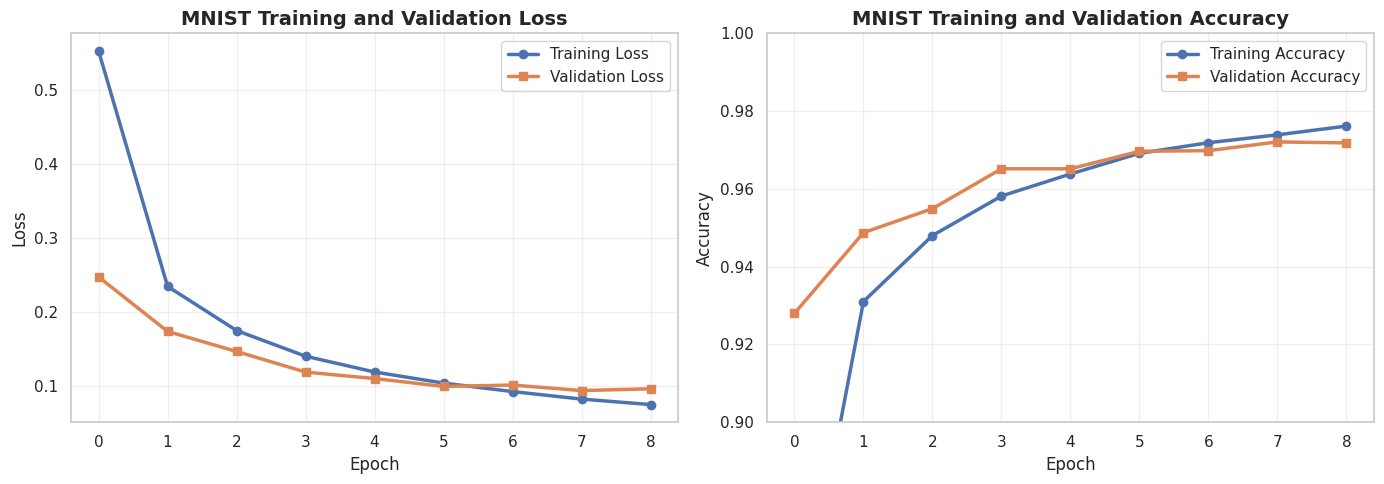

📊 FINAL MNIST TRAINING METRICS:
Training Loss:      0.0752
Validation Loss:    0.0965
Training Accuracy:  0.9761 (97.61%)
Validation Accuracy: 0.9718 (97.18%)


In [40]:
# Plot training history
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Loss curves
axes[0].plot(train_losses_mnist, label='Training Loss', linewidth=2.5, marker='o')
axes[0].plot(val_losses_mnist, label='Validation Loss', linewidth=2.5, marker='s')
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Loss', fontsize=12)
axes[0].set_title('MNIST Training and Validation Loss', fontsize=14, weight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Accuracy curves
axes[1].plot(train_accs_mnist, label='Training Accuracy', linewidth=2.5, marker='o')
axes[1].plot(val_accs_mnist, label='Validation Accuracy', linewidth=2.5, marker='s')
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Accuracy', fontsize=12)
axes[1].set_title('MNIST Training and Validation Accuracy', fontsize=14, weight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)
axes[1].set_ylim([0.9, 1.0])

plt.tight_layout()
plt.show()

print("📊 FINAL MNIST TRAINING METRICS:")
print(f"Training Loss:      {train_losses_mnist[-1]:.4f}")
print(f"Validation Loss:    {val_losses_mnist[-1]:.4f}")
print(f"Training Accuracy:  {train_accs_mnist[-1]:.4f} ({train_accs_mnist[-1]*100:.2f}%)")
print(f"Validation Accuracy: {val_accs_mnist[-1]:.4f} ({val_accs_mnist[-1]*100:.2f}%)")

### 4.5 Evaluate on Test Set

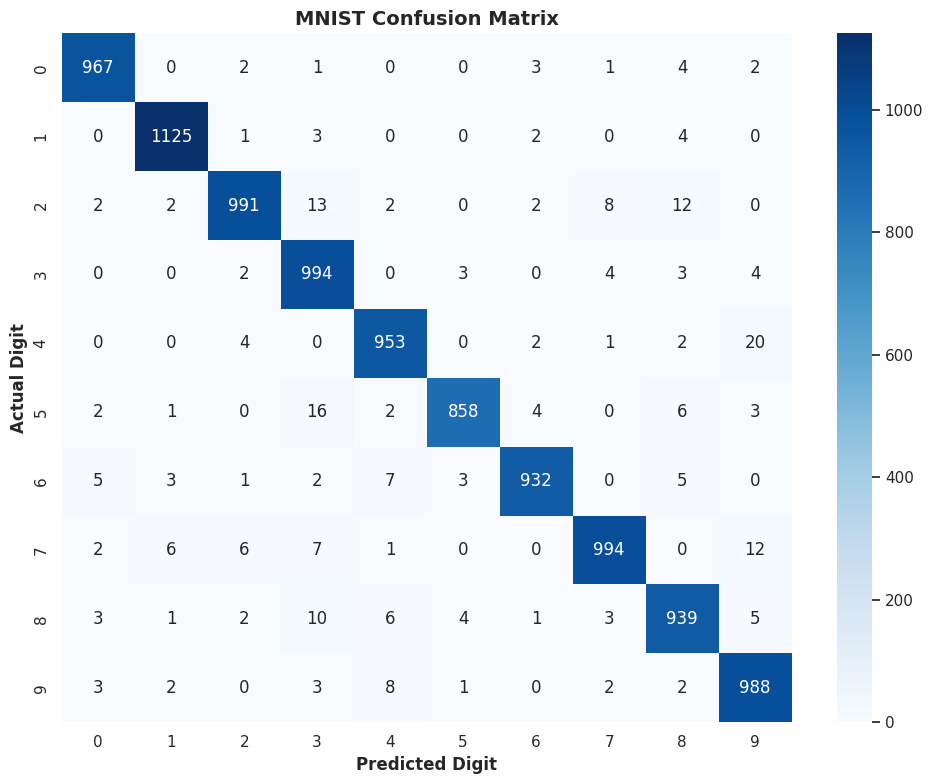

📊 TEST SET PERFORMANCE:
Test Accuracy: 0.9741 (97.41%)
Correct predictions: 9741 / 10000

🎯 Per-class accuracy:
  Digit 0: 0.9867 (98.67%)
  Digit 1: 0.9912 (99.12%)
  Digit 2: 0.9603 (96.03%)
  Digit 3: 0.9842 (98.42%)
  Digit 4: 0.9705 (97.05%)
  Digit 5: 0.9619 (96.19%)
  Digit 6: 0.9729 (97.29%)
  Digit 7: 0.9669 (96.69%)
  Digit 8: 0.9641 (96.41%)
  Digit 9: 0.9792 (97.92%)


In [41]:
# Evaluate on test set
mnist_model.eval()
test_correct = 0
test_total = 0
all_predictions = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader_mnist:
        images, labels = images.to(device), labels.to(device)
        outputs = mnist_model(images)
        _, predicted = torch.max(outputs, 1)
        
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()
        
        all_predictions.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

test_accuracy = test_correct / test_total

# Confusion matrix
cm_mnist = confusion_matrix(all_labels, all_predictions)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(cm_mnist, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=True)
ax.set_xlabel('Predicted Digit', fontsize=12, weight='bold')
ax.set_ylabel('Actual Digit', fontsize=12, weight='bold')
ax.set_title('MNIST Confusion Matrix', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

print("📊 TEST SET PERFORMANCE:")
print("=" * 60)
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"Correct predictions: {test_correct} / {test_total}")
print("\n🎯 Per-class accuracy:")

for i in range(10):
    class_correct = cm_mnist[i, i]
    class_total = cm_mnist[i, :].sum()
    class_acc = class_correct / class_total if class_total > 0 else 0
    print(f"  Digit {i}: {class_acc:.4f} ({class_acc*100:.2f}%)")

### 4.6 Visualize Predictions

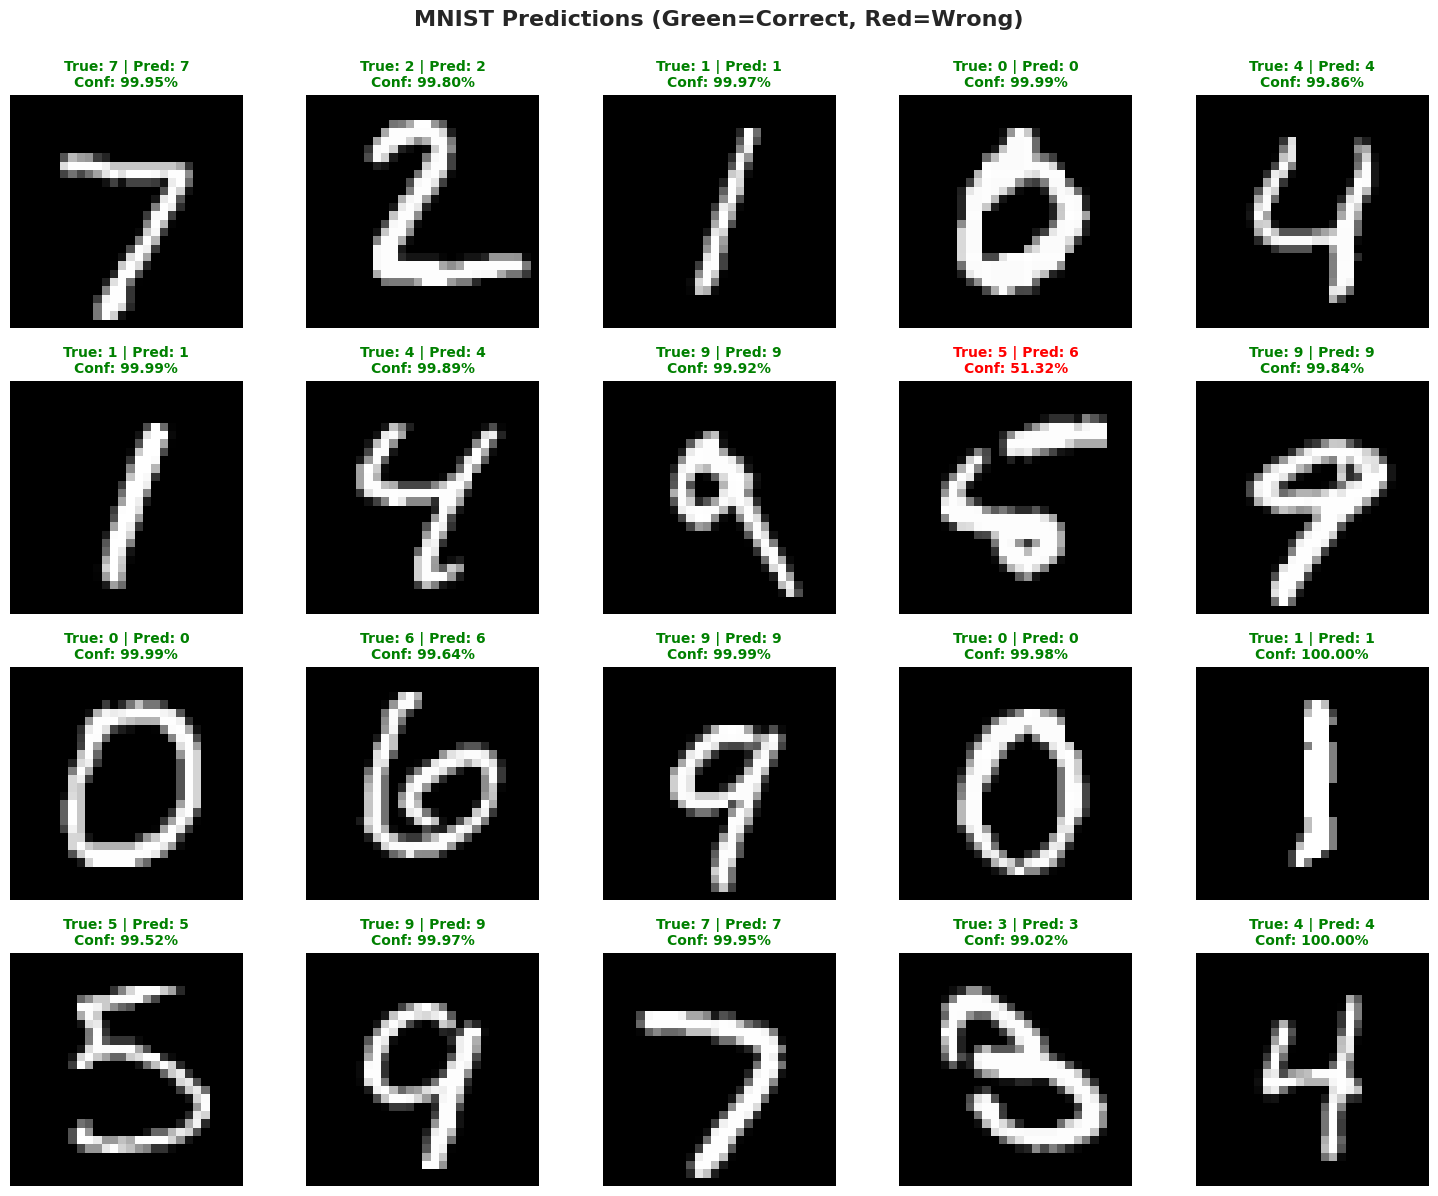

In [42]:
# Visualize predictions on test samples
mnist_model.eval()

# Get a batch of test data
test_iter = iter(test_loader_mnist)
images, labels = next(test_iter)
images, labels = images.to(device), labels.to(device)

# Get predictions
with torch.no_grad():
    outputs = mnist_model(images)
    probabilities = torch.softmax(outputs, dim=1)
    _, predictions = torch.max(outputs, 1)

# Show first 20 predictions
fig, axes = plt.subplots(4, 5, figsize=(15, 12))
fig.suptitle('MNIST Predictions (Green=Correct, Red=Wrong)', fontsize=16, weight='bold', y=0.995)

for i in range(20):
    ax = axes[i // 5, i % 5]
    
    img = images[i].cpu().squeeze().numpy()
    true_label = labels[i].cpu().item()
    pred_label = predictions[i].cpu().item()
    confidence = probabilities[i, pred_label].cpu().item()
    
    # Color: green if correct, red if wrong
    color = 'green' if pred_label == true_label else 'red'
    
    ax.imshow(img, cmap='gray')
    ax.set_title(f'True: {true_label} | Pred: {pred_label}\nConf: {confidence:.2%}', 
                fontsize=10, color=color, weight='bold')
    ax.axis('off')

plt.tight_layout()
plt.show()

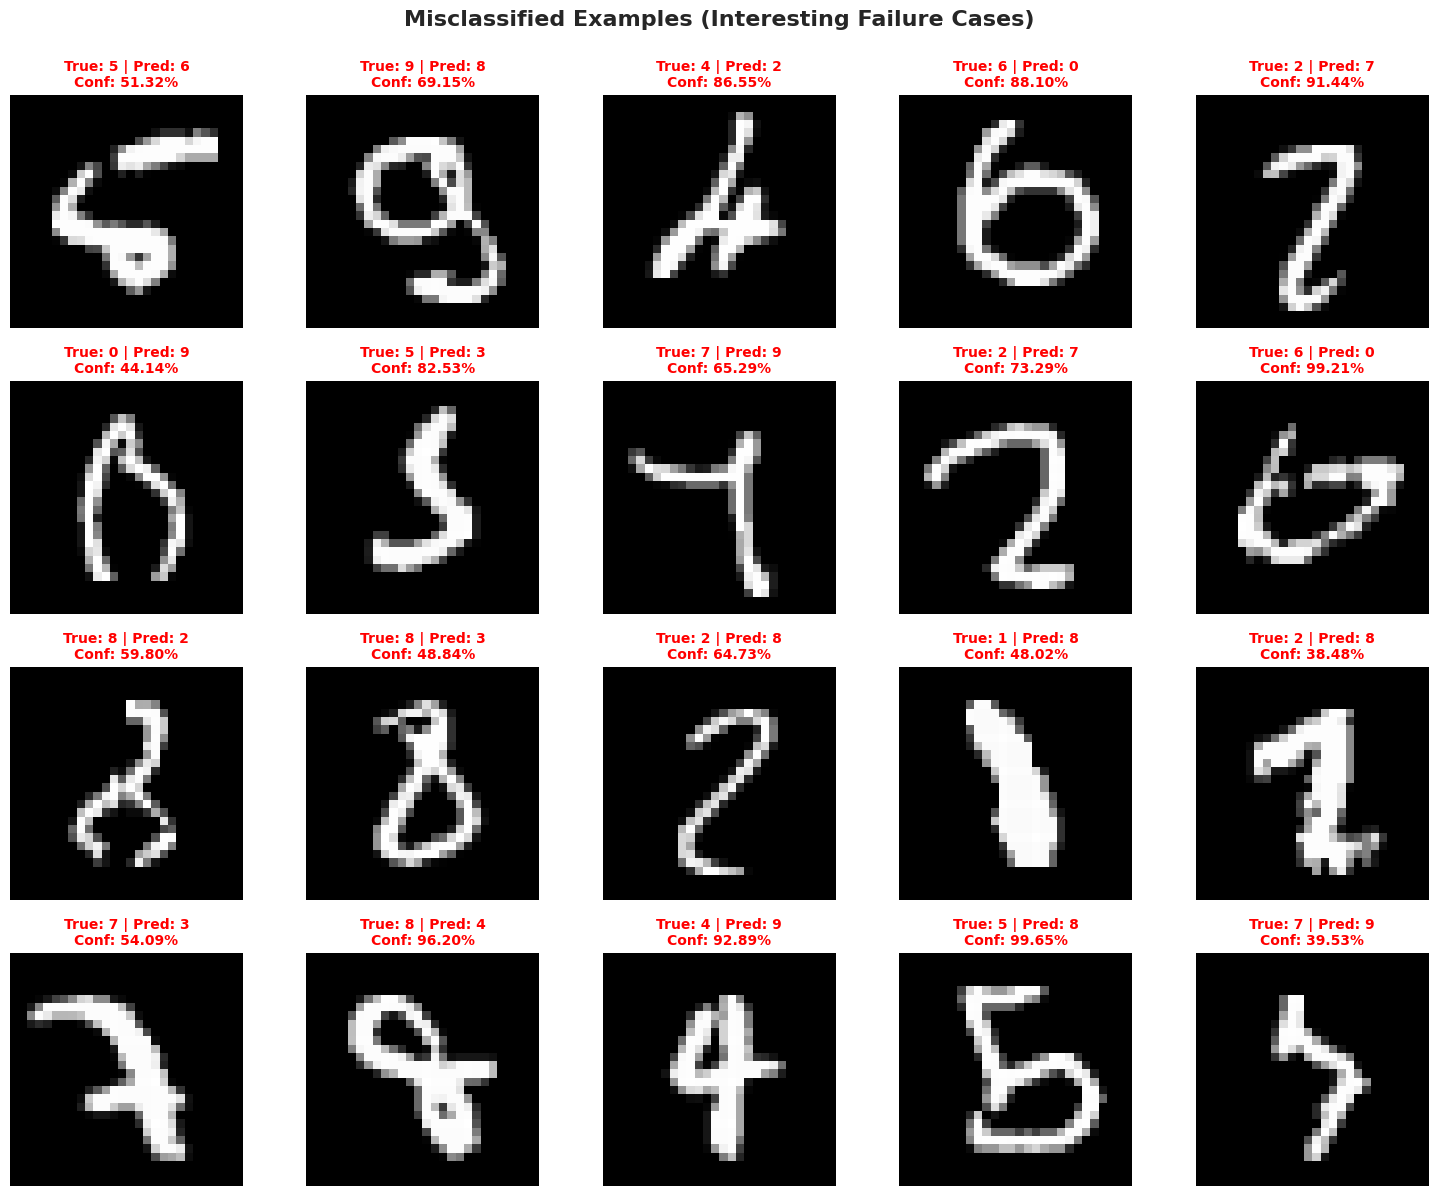

🔍 MISCLASSIFICATION ANALYSIS:
Total misclassified shown: 20

💡 Common patterns in errors:
  • Similar-looking digits (e.g., 4 vs 9, 3 vs 5, 7 vs 1)
  • Poorly written or ambiguous digits
  • Model still quite confident despite being wrong!


In [43]:
# Find and visualize misclassified examples
misclassified_indices = []
misclassified_images = []
misclassified_true = []
misclassified_pred = []
misclassified_conf = []

mnist_model.eval()
count = 0

with torch.no_grad():
    for images, labels in test_loader_mnist:
        images, labels = images.to(device), labels.to(device)
        outputs = mnist_model(images)
        probabilities = torch.softmax(outputs, dim=1)
        _, predictions = torch.max(outputs, 1)
        
        # Find misclassified in this batch
        wrong = predictions != labels
        
        for i in range(len(labels)):
            if wrong[i] and len(misclassified_indices) < 20:
                misclassified_indices.append(count + i)
                misclassified_images.append(images[i].cpu())
                misclassified_true.append(labels[i].cpu().item())
                misclassified_pred.append(predictions[i].cpu().item())
                misclassified_conf.append(probabilities[i, predictions[i]].cpu().item())
        
        count += len(labels)
        if len(misclassified_indices) >= 20:
            break

# Plot misclassified examples
fig, axes = plt.subplots(4, 5, figsize=(15, 12))
fig.suptitle('Misclassified Examples (Interesting Failure Cases)', fontsize=16, weight='bold', y=0.995)

for i in range(min(20, len(misclassified_images))):
    ax = axes[i // 5, i % 5]
    
    img = misclassified_images[i].squeeze().numpy()
    true_label = misclassified_true[i]
    pred_label = misclassified_pred[i]
    confidence = misclassified_conf[i]
    
    ax.imshow(img, cmap='gray')
    ax.set_title(f'True: {true_label} | Pred: {pred_label}\nConf: {confidence:.2%}', 
                fontsize=10, color='red', weight='bold')
    ax.axis('off')

plt.tight_layout()
plt.show()

print("🔍 MISCLASSIFICATION ANALYSIS:")
print("=" * 60)
print(f"Total misclassified shown: {len(misclassified_images)}")
print("\n💡 Common patterns in errors:")
print("  • Similar-looking digits (e.g., 4 vs 9, 3 vs 5, 7 vs 1)")
print("  • Poorly written or ambiguous digits")
print("  • Model still quite confident despite being wrong!")

## 5. Best Practices & Key Takeaways

Now that we've built and trained neural networks, let's consolidate the key lessons and best practices.

### 5.1 Architecture Decisions

**How many layers?**
- Start simple (1-2 hidden layers)
- Add more layers only if needed
- Deeper ≠ always better (especially for small datasets)

**How many neurons per layer?**
- Common pattern: gradually decrease size (e.g., 128 → 64 → 32)
- Input layer: number of features
- Output layer: number of classes (classification) or 1 (regression)
- Hidden layers: experiment, but typically 16-512 neurons

**Rules of Thumb:**
```
Tabular data:     1-3 hidden layers, 16-128 neurons
Image data:       3-5+ layers, 64-512 neurons (or use CNNs)
Sequence data:    Use RNNs/LSTMs/Transformers instead
```

### 5.2 Hyperparameter Tuning

**Learning Rate** (most important!):
- Too high → training unstable, loss explodes
- Too low → training too slow
- Good starting points: 0.001 (Adam), 0.01 (SGD)
- Use learning rate schedulers to decrease over time

**Batch Size**:
- Smaller (16-32): More updates, noisier gradients, regularization effect
- Larger (128-256): Faster training, smoother gradients, needs more memory
- Sweet spot: 32-128 for most tasks

**Number of Epochs**:
- Monitor validation loss and use early stopping
- Don't train longer once validation loss stops improving
- Typical range: 10-100 epochs

### 5.3 Preventing Overfitting

**Techniques:**
1. **Dropout**: Randomly deactivate neurons (0.2-0.5)
2. **L2 Regularization**: Penalize large weights
3. **Early Stopping**: Stop when validation loss increases
4. **Data Augmentation**: Create variations of training data
5. **More Data**: Best solution if possible
6. **Simpler Model**: Reduce layers/neurons

**Signs of Overfitting:**
- Training accuracy >> Validation accuracy
- Training loss keeps decreasing but validation loss increases
- Model performs poorly on new data

### 5.4 Debugging Neural Networks

**Common Issues:**

| Problem | Possible Causes | Solutions |
|---------|----------------|-----------|
| Loss not decreasing | Learning rate too high/low | Adjust LR, check gradients |
| Loss = NaN | Learning rate too high | Lower LR, check for numerical instability |
| Training too slow | Batch size too small | Increase batch size, use GPU |
| Overfitting | Model too complex | Add dropout, regularization, more data |
| Underfitting | Model too simple | Add layers/neurons, train longer |
| Poor test performance | Data leakage, overfitting | Check data splits, add regularization |

### 5.5 When to Use Neural Networks

**Use Neural Networks when:**
- ✅ You have large datasets (>10,000 samples)
- ✅ Complex patterns in images, text, or sequences
- ✅ Feature engineering is difficult
- ✅ Computational resources available (GPU)
- ✅ Black-box predictions are acceptable

**Use Traditional ML when:**
- ❌ Small dataset (< 1,000 samples)
- ❌ Simple tabular data with clear features
- ❌ Need interpretability (e.g., medical, legal domains)
- ❌ Limited compute resources
- ❌ Fast iteration/debugging required

## 6. Conclusions & Next Steps

### 🎓 What We Learned

**Neural Network Fundamentals:**
- Neurons combine inputs using weights, biases, and activation functions
- Networks are organized in layers: input → hidden → output
- Activation functions (ReLU, Sigmoid, Softmax) introduce non-linearity

**Training Process:**
- Loss functions measure prediction error
- Gradient descent optimizes weights to minimize loss
- Backpropagation computes gradients efficiently
- Training requires balancing underfitting vs overfitting

**Practical Experience:**
- Built binary classifier for Titanic survival (80%+ accuracy)
- Built multi-class classifier for MNIST digits (97%+ accuracy)
- Learned to use PyTorch for model building and training
- Visualized training dynamics and model predictions

**Key Insights:**
- Neural networks are universal function approximators
- More data and compute → better performance
- Regularization (dropout, early stopping) prevents overfitting
- Traditional ML can still be competitive on small tabular data
- Deep learning excels at images, text, and sequences

### 📊 Our Results Summary

| Task | Dataset | Model | Accuracy | Parameters |
|------|---------|-------|----------|------------|
| Binary Classification | Titanic | Neural Net | ~80% | 169 |
| Binary Classification | Titanic | Logistic Regression | ~80% | 10 |
| Multi-Class Classification | MNIST | Neural Net | ~97% | 109,386 |

**Takeaway**: Neural networks matched logistic regression on small tabular data (Titanic) but excelled on image data (MNIST) where pattern complexity benefits from deep learning.

### 🚀 Beyond This Notebook

**Specialized Architectures:**

1. **Convolutional Neural Networks (CNNs)**
   - Designed for image data
   - Uses convolution and pooling layers
   - Learns spatial hierarchies
   - Examples: ResNet, VGG, EfficientNet

2. **Recurrent Neural Networks (RNNs)**
   - Designed for sequential data
   - Maintains hidden state across time steps
   - Variants: LSTM, GRU
   - Applications: time series, text generation

3. **Transformers**
   - State-of-the-art for NLP
   - Attention mechanism instead of recurrence
   - Examples: BERT, GPT, T5
   - Now also used for vision (ViT)

**Advanced Techniques:**
- Transfer learning: Use pre-trained models
- Data augmentation: Artificially expand dataset
- Ensemble methods: Combine multiple models
- Hyperparameter optimization: Auto-tune settings
- Model compression: Make models smaller/faster

**Modern Frameworks:**
- PyTorch (what we used)
- TensorFlow/Keras
- JAX
- Fast.ai (high-level PyTorch)

### 📚 Recommended Resources

**Video Courses:**
- [3Blue1Brown Neural Networks Series](https://www.youtube.com/watch?v=aircAruvnKk) - Beautiful visualizations
- [Fast.ai Practical Deep Learning](https://course.fast.ai/) - Top-down approach
- [Stanford CS231n](https://cs231n.github.io/) - CNNs for Visual Recognition

**Books:**
- "Deep Learning" by Goodfellow, Bengio, Courville (comprehensive)
- "Hands-On Machine Learning" by Aurélien Géron (practical)
- "Deep Learning with PyTorch" by Stevens, Antiga, Viehmann

**Practice:**
- Kaggle competitions and datasets
- Papers with Code (implementations of research)
- PyTorch tutorials and documentation

### 💡 Final Advice

1. **Start Simple**: Always begin with a simple model and add complexity only if needed
2. **Visualize Everything**: Plot losses, predictions, activations
3. **Experiment**: Try different architectures, hyperparameters, techniques
4. **Use Pre-trained Models**: Don't train from scratch unless necessary
5. **Stay Current**: Field moves fast, follow research and best practices
6. **Practice**: Build projects, enter competitions, contribute to open source

**The best way to learn deep learning is by doing!** 🚀

## 📝 Homework Challenge

### CNN-Based MNIST Classifier

Now it's your turn to build a more advanced model! Implement a Convolutional Neural Network (CNN) for MNIST and compare it with our dense network.

**Requirements:**

1. **Use a Pre-trained Model**
   - Load a pre-trained CNN (e.g., ResNet, VGG, or similar)
   - Adapt it for MNIST (10 classes, grayscale input)

2. **Two-Phase Training**
   - **Phase 1**: Freeze backbone layers, train only the head (classification layer)
   - **Phase 2**: Unfreeze all layers, fine-tune the entire network

3. **Evaluation**
   - Measure performance on MNIST test set
   - Compare with our dense network (~97% accuracy)
   - Plot training/validation loss and accuracy curves

4. **Analysis**
   - Create confusion matrix
   - Visualize predictions on test samples
   - Analyze which digits the CNN handles better/worse than dense network

**Expected Outcome:**
- CNN should achieve 98%+ accuracy
- Better generalization with fewer parameters per layer
- Understanding of transfer learning and fine-tuning

**Starter Code Structure:**
```python
# 1. Load pre-trained model
model = torchvision.models.resnet18(pretrained=True)

# 2. Modify for MNIST
# - Adjust first conv layer for grayscale (1 channel)
# - Replace final fully connected layer for 10 classes

# 3. Phase 1: Freeze and train head
for param in model.parameters():
    param.requires_grad = False
# Unfreeze final layer
model.fc.requires_grad = True

# 4. Train for a few epochs

# 5. Phase 2: Unfreeze all and fine-tune
for param in model.parameters():
    param.requires_grad = True

# 6. Train for more epochs

# 7. Evaluate and compare!
```

**Bonus Challenges:**
- Try different pre-trained models (VGG, EfficientNet, MobileNet)
- Implement data augmentation (rotation, scaling)
- Visualize learned convolutional filters
- Create an ensemble of multiple models

Good luck! 🚀

---

## 🎉 Congratulations!

You've completed the Deep Learning & Neural Networks session! 

**What you've accomplished:**
- ✅ Understood neural network fundamentals (neurons, activations, layers)
- ✅ Learned the training process (loss, gradient descent, backpropagation)
- ✅ Built binary classification models with PyTorch
- ✅ Built multi-class image classifiers (MNIST)
- ✅ Compared neural networks with traditional ML
- ✅ Learned best practices and when to use deep learning

**Your journey continues:**
This notebook is part of a series. Check out the other notebooks:
- **00-basics.ipynb**: ML fundamentals with Titanic dataset
- **01-boston_housing.ipynb**: Regression problems
- **02-embeddings.ipynb**: Feature vectors and semantic similarity

**Keep practicing and experimenting!** 🚀

*Questions or feedback? Reach out to the instructor or study group.*